# 🛒 Online Retail Analysis & Insights
## Data Science Major Project

**Project Overview:** This notebook demonstrates a modular data pipeline for an E-commerce dataset. It includes automated data cleaning, exploratory data analysis (EDA), and automated business reporting.

---

### 📋 Project Objectives
* **Data Wrangling:** Clean and preprocess raw transactional data, handling missing values and outliers.
* **Exploratory Data Analysis (EDA):** Uncover patterns in customer behavior and sales trends across different regions.
* **Product Performance:** Identify top-selling products by quantity and revenue.
* **Strategic Insights:** Provide actionable business recommendations based on geographic distribution and market dominance.

---

### 🛠️ Technical Stack
* **Language:** Python 3.x
* **Libraries:** `pandas` (Data Manipulation), `numpy` (Numerical Computing), `matplotlib` (Visualisation).
* **Environment:** JupyterLab / Anaconda.

---

### 📖 Data Dictionary
| Feature | Description |
| :--- | :--- |
| **InvoiceNo** | A unique 6-digit integral number assigned to each transaction. |
| **StockCode** | A unique 5-digit integral number assigned to each distinct product. |
| **Description** | Product name. |
| **Quantity** | The quantities of each product per transaction. |
| **UnitPrice** | Product price per unit in sterling (£). |
| **CustomerID** | A unique 5-digit integral number assigned to each customer. |
| **Country** | The name of the country where each customer resides. |

---

# Section 1: Library Initialisation
In this section, we import the essential libraries required for data manipulation, numerical computation, and data visualisation.

In [50]:
# Importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt


# importing os
import os

---
## Section 2: Loading the Dataset
In this step, we import the raw transactional data from the Excel file. This dataset contains over 500,000 rows of retail transactions, including details on products, quantities, prices, and customer locations.

In [51]:
# Get the parent directory of the current working directory
# Example: if current path is .../Jupyter Notebook
# this moves one level up to the main project folder
base_dir = os.path.dirname(os.getcwd())

# Create the full path to the Excel file inside the Data folder
data_path = os.path.join(base_dir, "data", "OnlineRetail.xlsx")

# Read the OnlineRetail Excel file and load the specified sheet into a DataFrame
online_retail = pd.read_excel(data_path, sheet_name="OnlineRetail")

# Print the dataset to verify that data is loaded correctly
print(online_retail)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

### 📊 Dataset Summary
* **Total Records:** 541,909
* **Features:** 8 columns (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country)
* **Time Period:** Dec 2010 – Dec 2011
---

## Section 3: Data Inspection and Schema Validation
Before proceeding with analysis, we must understand the data types and identify missing values (nulls). This step is crucial for determining the data-cleaning strategy.

In [52]:
# information about the dataset
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 🔍 Key Observations from Data Metadata:
* **Missing Data:** The `Description` column has some missing entries (~1,454 rows), but more importantly, the `CustomerID` column has a significant amount of missing data (approx. 25% of the dataset is missing IDs).
* **Data Types:** * `InvoiceDate` is correctly identified as a **datetime** object.
    * `UnitPrice` and `Quantity` are numeric, which is perfect for calculation.
    * `InvoiceNo` is an **object**, which is correct as it can sometimes contain letters (e.g., 'C' for cancellations).
* **Memory Usage:** The dataset occupies ~33.1 MB, which is well within the limits for local processing.
---

### 📏 Dimensionality Check
We use the `.shape` attribute to verify the size of the dataset. This helps us track how many rows are removed during the cleaning process later on.

In [53]:
# No of rows and No of columns in a dataset
online_retail.shape

(541909, 8)

### 📏 Dataset Dimensions
The `.shape` attribute provides a quick confirmation of the dataset's scale. Currently, the dataset consists of:
* **Rows:** 541,909 (Individual transaction records)
* **Columns:** 8 (Features/Attributes)

This high volume of data allows for robust analysis of seasonal trends and customer purchasing patterns.
 
---

### 📊 Descriptive Statistics
By filtering for numeric data types (`int` and `float`), we can examine the distribution of our key metrics. This summary is essential for spotting anomalies, outliers, and data entry errors.

In [54]:
online_retail.select_dtypes(include = ["int", "float"]).describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### ⚠️ Critical Findings from Statistics:

* **Negative Values found:** * The `min` for **Quantity** is `-80995`. 
    * The `min` for **UnitPrice** is `-11062.06`.
    * *Insight:* Negative quantities usually represent **returned items** or **cancellations**, while negative prices may indicate **adjustments** or **bad debt**. These will need to be handled to avoid skewing revenue totals.

* **Outliers:** * There is a massive jump from the 75th percentile to the `max` value in both Quantity and Price.
    * *Action:* We will need to investigate if these are legitimate bulk orders or data errors.

* **Missing Customer IDs:** * The `count` for `CustomerID` (406,829) is much lower than the other columns (541,909), confirming the missing data we identified earlier.

  ---

### 🚫 Removing Invalid Transactions
The descriptive statistics revealed negative values in `Quantity` and `UnitPrice`. In a retail context, negative quantities typically represent cancellations or returns, while negative prices are often data entry errors. To ensure our revenue and volume analysis is accurate, we must remove these records.

In [55]:
# Counting the negative values in the dataset
print(online_retail[online_retail.select_dtypes(include = ["int", "float"]) < 0].count())
# In the "Quantity" column there are 10624 rows are negative values

# droping the negative rows in the dataset
online_retail.drop(online_retail[online_retail.Quantity < 0].index, axis = 0, inplace = True)

# checking after droping the negative rows in the "Quantity" column
print(online_retail[online_retail["Quantity"] < 0]["Quantity"].count())

# remove the negative "UnitPrice" rows
online_retail.drop(online_retail[online_retail.UnitPrice < 0].index, axis = 0, inplace = True)

# checking after droping the negative rows in the "UnitPrice" column
print(online_retail[online_retail["UnitPrice"] < 0]["UnitPrice"].count())

InvoiceNo          0
StockCode          0
Description        0
Quantity       10624
InvoiceDate        0
UnitPrice          2
CustomerID         0
Country            0
dtype: int64
0
0


### ✅ Cleanup Results:
* **Quantity Fix:** Successfully removed **10,624** rows containing negative quantities (returns/cancellations).
* **Price Fix:** Successfully removed **2** rows with negative unit prices.
* **Impact:** Our dataset is now restricted to successful sales transactions, providing a cleaner baseline for revenue calculation.
---

### ➕ Calculated Field: TotalAmount
To perform a meaningful financial analysis, we need the total revenue generated by each transaction line item. We create a new feature, `TotalAmount`, by multiplying the quantity of items by their unit price ($Quantity \times UnitPrice$).

In [56]:
# adding the new column into the dataset that is "TotalAmount"
online_retail = online_retail.assign(TotalAmount = online_retail.Quantity * online_retail.UnitPrice)

# printing the columns in a dataset
print(online_retail.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')


### ✅ Updated Schema
The dataset now contains **9 columns**. The addition of `TotalAmount` allows us to move beyond simple volume counts and start analyzing **Gross Revenue** by country, customer, and time period.

---

### 🗑️ Handling Missing Values (NaN)
Now that we have removed logical errors (negative values), we address the missing data. By using `.dropna()`, we ensure that our analysis—especially customer-level metrics—is based on records with complete information, specifically focusing on rows where `CustomerID` and `Description` are present.

In [57]:
# droping the dublicate values in the dataset
online_retail.dropna(inplace = True)
online_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

### ✅ Cleaned Dataset Profile
* **Null Check:** All columns now show a count of **0**, indicating a fully populated dataset.
* **Integrity:** Every remaining transaction is now linked to a specific **CustomerID**, which is vital for performing Cohort Analysis or Customer Segmentation (RFM).
* **Next Steps:** With the data cleaned and a `TotalAmount` column added, the dataset is ready for Exploratory Data Analysis (EDA) and Visualization.
---

### 📋 Cleaned Data Sample
With the data cleaning process complete and the new `TotalAmount` feature added, we inspect the first 100 rows. This serves as a final quality check to ensure that:
1. **Quantity and UnitPrice** are positive.
2. **TotalAmount** is calculated correctly.
3. **CustomerID** is present for every transaction.

In [58]:
print(online_retail.head(100))

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
..       ...       ...                                  ...       ...   
95    536378     22352     LUNCH BOX WITH CUTLERY RETROSPOT         6   
96    536378     21212      PACK OF 72 RETROSPOT CAKE CASES       120   
97    536378     21975       PACK OF 60 DINOSAUR CAKE CASES        24   
98    536378     21977   PACK OF 60 PINK PAISLEY CAKE CASES        24   
99    536378     84991          60 TEATIME FAIRY CAKE CASES        24   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0  2010-12-01 08:26:00       2.55     17850.0 

### ✅ Data Integrity Check
* **Consistent Schema:** Every row now contains the calculated `TotalAmount` (e.g., Row 0: $6 \times 2.55 = 15.30$).
* **Data Types:** All columns are correctly aligned, and the `InvoiceDate` retains its datetime formatting.
* **Ready for Visualization:** The dataset is now structurally sound and ready for aggregation and plotting.
---

### 📏 Post-Cleaning Dataset Dimensions
We begin our Exploratory Data Analysis (EDA) by verifying the final size of the dataset. After removing negative values (returns), invalid prices, and transactions without Customer IDs, we can now see the total volume of "clean" sales records available for analysis.

In [59]:
# EDA operations

# Checking the shape
print(online_retail.shape)

(397924, 9)


### 📊 Cleaning Summary:
* **Initial Records:** 541,909
* **Final Records:** 397,924
* **Reduction:** Approximately **26.5%** of the data was removed. 

**Conclusion:** The majority of the removed data consisted of transactions without `CustomerID`. By keeping only these ~398k rows, we ensure that every data point used in our analysis is tied to a verified customer transaction, which is essential for accurate business intelligence.

---

### 📈 Statistical Profile of Cleaned Data
With the dataset sanitized, we run a final descriptive analysis. This provides the mathematical boundaries for our EDA, helping us understand the typical transaction value and identifying any extreme outliers that remain.

In [60]:
# Describe the dataset
print(online_retail.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID    TotalAmount  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.169877     309.055588  


### 📊 Comparative Analysis:
* **Quantity & Price:** Notice that the `min` for both is no longer negative. The minimum quantity is now **1**, and the minimum price is **0** (likely promotional items).
* **Transaction Value:** The average (`mean`) transaction amount is **£22.39**, while 75% of transactions are under **£19.80**.
* **The "Whale" Transaction:** The `max` for `TotalAmount` is **£168,469.60**. This is a significant outlier that suggests a massive bulk purchase, which we may need to investigate further.
* **Timeline:** Our data spans from **December 2010** to **December 2011**, covering a full year of retail cycles.
---

### 📋 Final Schema Inspection
Before moving into visualization, we perform a final check of the data types and non-null counts. This ensures that our previous cleaning steps (dropping nulls and adding the `TotalAmount` column) are correctly reflected in the dataframe's structure.

In [61]:
# Information about the dataset
print(online_retail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


### ✅ Data Readiness Checklist:
* **Record Count:** 397,924 entries (down from 541,909 due to removal of nulls and negatives).
* **Column Count:** 9 columns (including the engineered `TotalAmount`).
* **Memory Optimization:** Memory usage has decreased to approximately **30.4 MB**.
* **Integrity:** All columns now have an equal number of non-null values, meaning the dataset is perfectly "rectangular" and ready for aggregation.
---

### 👥 Unique Customer Count
One of the most critical metrics for any retail business is the size of its active customer base. By counting the unique `CustomerID` values, we determine how many individual shoppers are represented in our cleaned dataset.

In [62]:
# No of users in a online retail
print(len(online_retail.CustomerID.unique()))

4339


### 📊 Reach Summary:
* **Total Unique Customers:** 4,339
* **Average Transactions per Customer:** ~91.7 records per user ($397,924 / 4,339$)

**Analysis:** With over 4,300 unique customers, the dataset provides a diverse range of purchasing behaviors. This high volume of repeat transactions per customer makes this data ideal for **Loyalty Analysis** and **Customer Lifetime Value (CLV)** modeling.

---

### 🌍 Global Reach: Unique Countries
To understand the international scale of the business, we identify how many unique countries are represented in the transaction records. This informs whether the retailer has a localized or global market presence.

In [63]:
# No of cuntries in a online retail
print(online_retail.Country.nunique())

37


### 📊 Market Breadth:
* **Total Countries:** 37
* **Context:** The presence of 37 distinct countries indicates a strong international footprint. While the majority of data usually trends toward the "Home" country (often the UK in this specific dataset), the international segment offers opportunities to analyze cross-border shipping trends and regional preferences.
---

### 📦 Unique Product Diversity
To understand the variety of the inventory, we calculate the number of unique products sold. This metric helps determine whether the retailer specializes in a niche market or offers a broad catalog of items.

In [64]:
# Number of unique items in the dataset
num_items = online_retail['Description'].nunique()
print(f"✅ Number of unique items: {num_items}")

✅ Number of unique items: 3866


### 📊 Catalog Breadth:
* **Total Unique Items:** 3,866
* **Context:** A catalog of nearly 4,000 unique products suggests a highly diversified inventory, likely ranging across multiple categories. 

**Next Step:** We can now investigate which of these 3,866 items are the "Top Sellers" by volume or revenue to identify the core drivers of the business.

---

### 🗺️ Revenue by Country
To identify our most profitable markets, we aggregate the `TotalAmount` for each country. This high-level summary reveals the geographic concentration of sales and highlights which international markets are contributing the most to the bottom line.

In [65]:
# Country-wise total sales
country_sales = online_retail.groupby("Country")["TotalAmount"].sum()
print("✅ Country-wise total sales:")
print(country_sales)

✅ Country-wise total sales:
Country
Australia                138521.310
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265545.900
European Community         1300.250
Finland                   22546.080
France                   209024.050
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33

### 📊 Sales Analysis:
* **The Domestic Giant:** The **United Kingdom** is the primary market, contributing over **£7.3 Million** in revenue.
* **Top International Performers:** 1. **Netherlands:** ~£285k
    2. **EIRE (Ireland):** ~£265k
    3. **Germany:** ~£228k
    4. **France:** ~£209k
* **Emerging Markets:** Countries like **Saudi Arabia** and **Czech Republic** represent a very small fraction of total sales, suggesting these may be niche or developing markets for the retailer.

**Strategic takeaway:** The data is heavily skewed toward the UK. For more granular international analysis, it may be beneficial to view these figures on a logarithmic scale or separate the UK from the rest of the world.

---

## 📊 Sales Analysis: Top 10 Countries by Revenue

This section identifies the top-performing markets in the dataset by calculating the sum of the `TotalAmount` for each country.

### 1. Data Processing and Visualization
The code below aggregates the sales data, prints a summary, and generates a horizontal bar chart to compare the markets.


Top 10 Countries by Total Sales:

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalAmount, dtype: float64


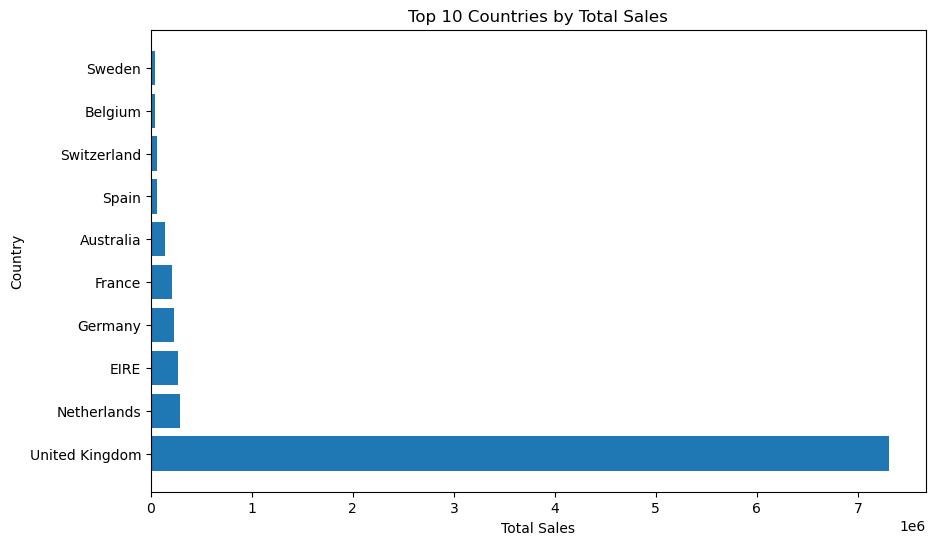

In [66]:
# Top 10 countries highest sales
Top_Countries_Highest_Sales = (
    online_retail.groupby("Country")["TotalAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Clean print statement
print("\nTop 10 Countries by Total Sales:\n")
print(Top_Countries_Highest_Sales)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(Top_Countries_Highest_Sales.index, Top_Countries_Highest_Sales.values)
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total Sales")
plt.show()



### 2. Summary of Results

| Rank | Country | Total Sales Amount |
| :--- | :--- | :--- |
| 1 | **United Kingdom** | **7,308,391.55** |
| 2 | Netherlands | 285,446.34 |
| 3 | EIRE | 265,545.90 |
| 4 | Germany | 228,867.14 |
| 5 | France | 209,024.05 |
| 6 | Australia | 138,521.31 |
| 7 | Spain | 61,577.11 |
| 8 | Switzerland | 56,443.95 |
| 9 | Belgium | 41,196.34 |
| 10 | Sweden | 38,378.33 |

**Key Insight:** The **United Kingdom** is the primary driver of revenue, significantly outperforming all other international markets combined.

---

## 📦 Product Analysis: Top 10 Best-Selling Products by Quantity

This section identifies which specific products have the highest sales volume across the entire dataset by aggregating the total `Quantity` sold for each item description.


========== Top 10 Best-Selling Products by Quantity ==========

                                    Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
ASSORTED COLOUR BIRD ORNAMENT          35362
PACK OF 72 RETROSPOT CAKE CASES        33693
POPCORN HOLDER                         30931
RABBIT NIGHT LIGHT                     27202
MINI PAINT SET VINTAGE                 26076




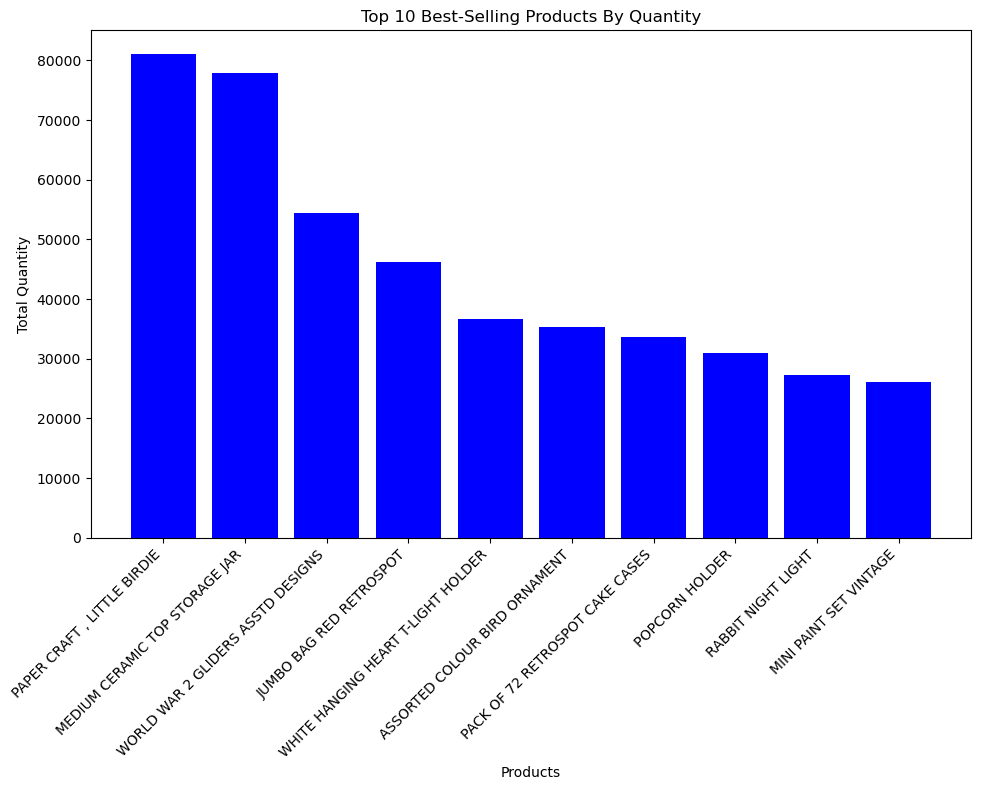

In [67]:
# Top 10 best-selling products by quantity
Top_Best_Selling_Product = (
    online_retail
    .groupby("Description")
    .agg({"Quantity": "sum"})
    .sort_values(by="Quantity", ascending=False)
    .head(10)
)

# Clean print statement
print("\n========== Top 10 Best-Selling Products by Quantity ==========\n")
print(Top_Best_Selling_Product)
print("\n==============================================================\n")

# Visualization
plt.figure(figsize=(10, 8))
plt.bar(
    x=Top_Best_Selling_Product.index,
    height=Top_Best_Selling_Product["Quantity"],
    color="blue"
)
plt.title("Top 10 Best-Selling Products By Quantity")
plt.xlabel("Products")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 📊 Key Insights: Product Volume
The table below highlights the items that move the most inventory.

| Rank | Product Description | Total Quantity Sold |
| :--- | :--- | :--- |
| 1 | **PAPER CRAFT, LITTLE BIRDIE** | **80,995** |
| 2 | MEDIUM CERAMIC TOP STORAGE JAR | 77,916 |
| 3 | WORLD WAR 2 GLIDERS ASSTD DESIGNS | 54,415 |
| 4 | JUMBO BAG RED RETROSPOT | 46,181 |
| 5 | WHITE HANGING HEART T-LIGHT HOLDER | 36,725 |

**Observations:**
* The **Paper Craft, Little Birdie** is the most popular item by volume.
* There is a high demand for decorative home items and small toys/novelty gifts.
* Understanding these high-volume items helps in inventory management and warehouse space allocation.
---

## 💰 Revenue Analysis: Top 10 Products by Sales Amount

While quantity shows volume, analyzing the **Total Sales Amount** (Price × Quantity) identifies the true revenue drivers for the business. This section highlights the products that contribute the most to the bottom line.


========== Top 10 Products Based on Total Sales Amount ==========

                                    TotalAmount
Description                                    
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20




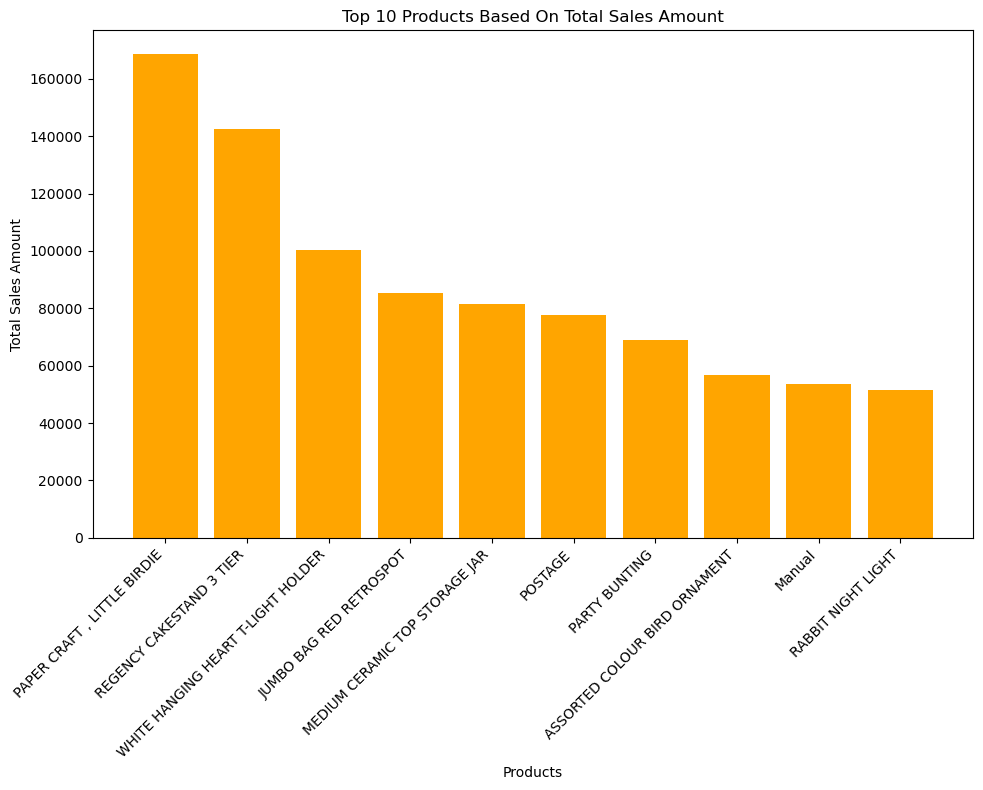

In [68]:
# Top 10 products based on total sales amount
top_products_total_amount = (
    online_retail
    .groupby("Description")
    .agg({"TotalAmount": "sum"})
    .sort_values(by="TotalAmount", ascending=False)
    .head(10)
)

# Clean and formatted print statement
print("\n========== Top 10 Products Based on Total Sales Amount ==========\n")
print(top_products_total_amount)
print("\n=================================================================\n")

# Visualization
plt.figure(figsize=(10, 8))
plt.bar(
    x=top_products_total_amount.index,
    height=top_products_total_amount["TotalAmount"],
    color="orange"
)
plt.title("Top 10 Products Based On Total Sales Amount")
plt.xlabel("Products")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📝 Revenue Summary Table

| Rank | Product Description | Total Revenue |
| :--- | :--- | :--- |
| 1 | **PAPER CRAFT, LITTLE BIRDIE** | **168,469.60** |
| 2 | REGENCY CAKESTAND 3 TIER | 142,592.95 |
| 3 | WHITE HANGING HEART T-LIGHT HOLDER | 100,448.15 |
| 4 | JUMBO BAG RED RETROSPOT | 85,220.78 |
| 5 | MEDIUM CERAMIC TOP STORAGE JAR | 81,416.73 |

### 🔍 Key Insights
* **Top Performer:** "PAPER CRAFT, LITTLE BIRDIE" is the clear leader in both quantity (as seen previously) and total revenue.
* **High-Value Items:** Products like the "REGENCY CAKESTAND 3 TIER" rank highly here, likely due to a combination of moderate volume and a higher unit price point.
* **Service Fees:** Note that **"POSTAGE"** and **"Manual"** entries appear in the top 10 revenue list, which may represent shipping fees or specialized manual adjustments rather than physical product sales.
---

## 🏷️ Pricing Analysis: Top 10 Products by Cumulative UnitPrice

This section identifies products that either have high individual unit prices or have high pricing consistently across multiple entries. Analyzing this helps identify premium items and service-related costs.


========== Top 10 Products with Highest UnitPrice ==========

Description
Manual                                49782.81
POSTAGE                               34695.96
REGENCY CAKESTAND 3 TIER              21508.90
DOTCOM POSTAGE                        11906.36
PARTY BUNTING                          6807.42
CARRIAGE                               6668.00
WHITE HANGING HEART T-LIGHT HOLDER     5867.22
CREAM SWEETHEART MINI CHEST            5755.06
SET OF 3 CAKE TINS PANTRY DESIGN       5741.24
BREAD BIN DINER STYLE IVORY            5636.03
Name: UnitPrice, dtype: float64




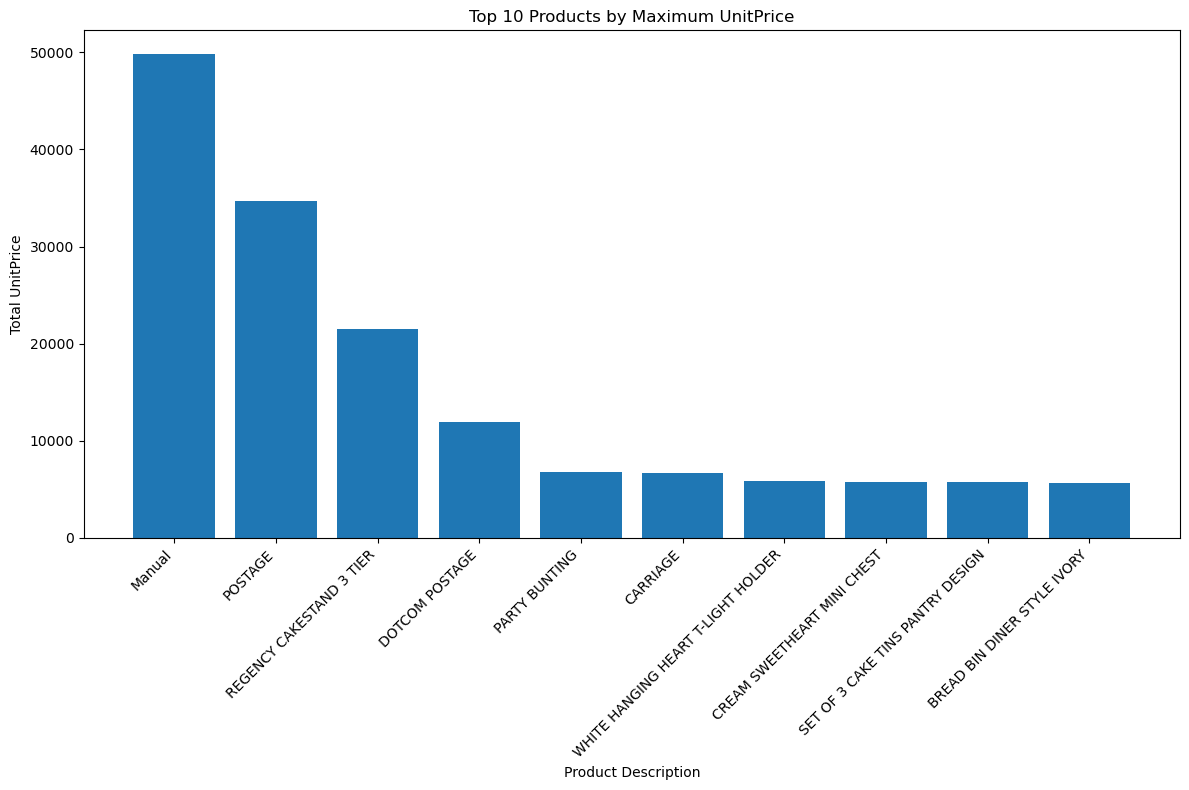

In [69]:
# Top 10 products with highest UnitPrice
top_max_unitprice = (
    online_retail
    .groupby("Description")["UnitPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Clean print statement
print("\n========== Top 10 Products with Highest UnitPrice ==========\n")
print(top_max_unitprice)
print("\n============================================================\n")

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(
    top_max_unitprice.index,
    top_max_unitprice.values
)
plt.title("Top 10 Products by Maximum UnitPrice")
plt.xlabel("Product Description")
plt.ylabel("Total UnitPrice")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📝 Pricing Summary Table

| Rank | Product Description | Total UnitPrice Sum |
| :--- | :--- | :--- |
| 1 | **Manual** | **49,782.81** |
| 2 | POSTAGE | 34,695.96 |
| 3 | REGENCY CAKESTAND 3 TIER | 21,508.90 |
| 4 | DOTCOM POSTAGE | 11,906.36 |
| 5 | PARTY BUNTING | 6,807.42 |

### 🔍 Key Observations
* **Non-Product Costs:** The highest "prices" in the dataset are attributed to **Manual** adjustments and **Postage/Shipping** fees. These often represent high-value administrative or logistical entries rather than physical inventory items.
* **Premium Inventory:** Excluding service fees, the **REGENCY CAKESTAND 3 TIER** remains a top performer, indicating it is one of the more expensive retail items that also sells frequently.
* **Data Context:** Summing `UnitPrice` can sometimes reflect how often a price was listed across different transactions. To find the single most expensive item, you might consider using `.max()` instead of `.sum()`.
---

## Region Analysis: Most Frequently Sold Items (United Kingdom)

Since the United Kingdom is the primary market for this retailer, this section isolates UK transactions to identify regional product preferences and high-volume inventory movers.


========== Most Frequently Sold Items in the United Kingdom ==========

                                    Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49182
JUMBO BAG RED RETROSPOT                41981
WHITE HANGING HEART T-LIGHT HOLDER     34648
ASSORTED COLOUR BIRD ORNAMENT          32727
POPCORN HOLDER                         28935
PACK OF 12 LONDON TISSUES              24337
BROCADE RING PURSE                     22711
PACK OF 72 RETROSPOT CAKE CASES        22465




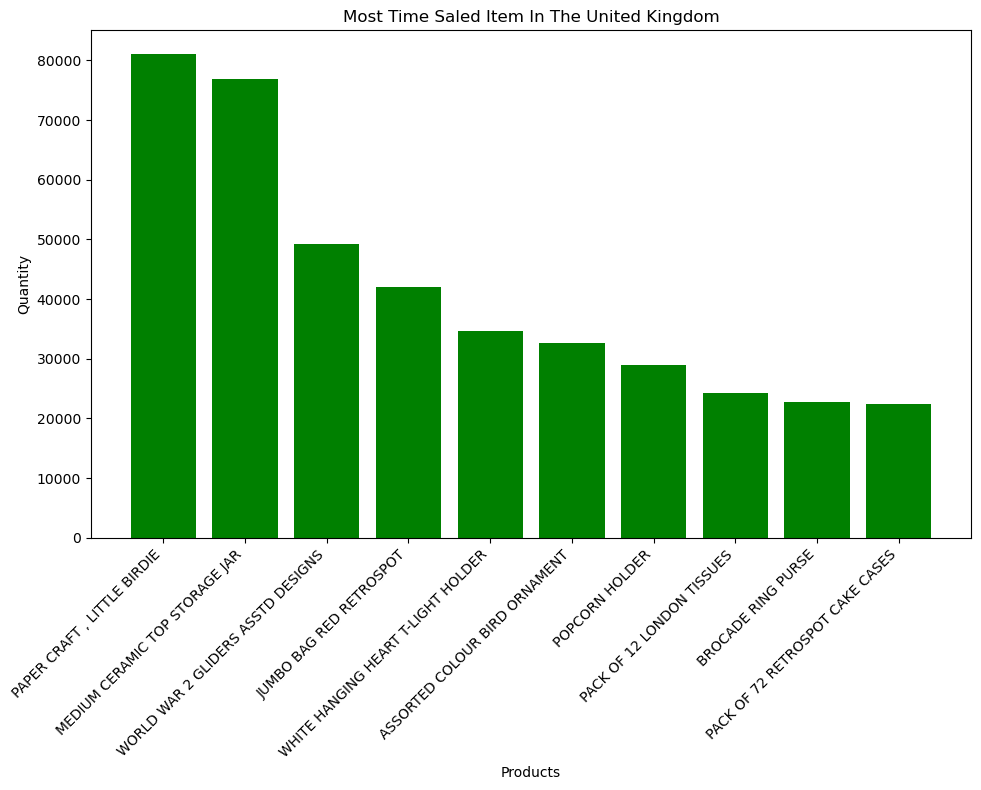

In [70]:
# Most time saled item in the United Kingdom
top_saled_item_uk = (
    online_retail[online_retail.Country == "United Kingdom"]
    .groupby("Description")
    .agg({"Quantity": "sum"})
    .sort_values(by="Quantity", ascending=False)
    .head(10)
)

# Clean print statement
print("\n========== Most Frequently Sold Items in the United Kingdom ==========\n")
print(top_saled_item_uk)
print("\n======================================================================\n")

# Visualization
plt.figure(figsize=(10, 8))
plt.bar(
    x=top_saled_item_uk.index,
    height=top_saled_item_uk["Quantity"],
    color="green"
)
plt.title("Most Time Saled Item In The United Kingdom")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📊 UK Sales Summary Table

| Rank | Product Description | Quantity Sold (UK) |
| :--- | :--- | :--- |
| 1 | **PAPER CRAFT, LITTLE BIRDIE** | **80,995** |
| 2 | MEDIUM CERAMIC TOP STORAGE JAR | 76,919 |
| 3 | WORLD WAR 2 GLIDERS ASSTD DESIGNS | 49,182 |
| 4 | JUMBO BAG RED RETROSPOT | 41,981 |
| 5 | WHITE HANGING HEART T-LIGHT HOLDER | 34,648 |

### 🔍 Key Insights
* **Market Leader:** The **"PAPER CRAFT, LITTLE BIRDIE"** remains the top item, indicating its high volume is driven almost entirely by the UK market.
* **Storage & Decor:** There is a notable trend in home storage (Storage Jars) and lighting (T-Light Holders) within the top 5.
* **Inventory Focus:** Items like the "PACK OF 12 LONDON TISSUES" appear specifically in the UK top list, suggesting localized demand for themed souvenirs or essentials.
---

## Financial Analysis: Top 10 Revenue-Generating Products (UK)

This section isolates the United Kingdom market to identify which products generate the highest total revenue. This helps distinguish between high-volume items and high-value items within the company's largest market.


========== Top 10 Products by Total Sales Amount in the United Kingdom ==========

                                    TotalAmount
Description                                    
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              110990.20
WHITE HANGING HEART T-LIGHT HOLDER     94858.60
MEDIUM CERAMIC TOP STORAGE JAR         80291.44
JUMBO BAG RED RETROSPOT                77371.57
PARTY BUNTING                          63109.38
ASSORTED COLOUR BIRD ORNAMENT          52395.99
CHILLI LIGHTS                          45505.31
PAPER CHAIN KIT 50'S CHRISTMAS         40451.08
PICNIC BASKET WICKER 60 PIECES         39619.50




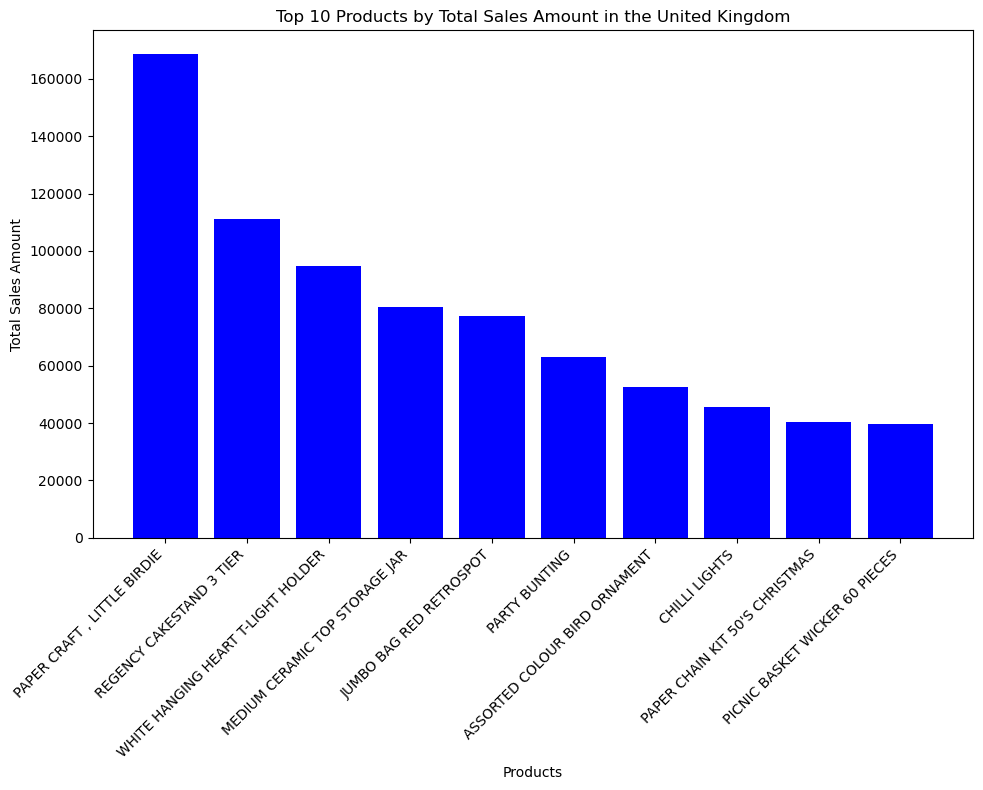

In [71]:
# The Total amount of sold items in the United Kingdom
total_amount_saled_item_uk = (
    online_retail[online_retail.Country == "United Kingdom"]
    .groupby("Description")
    .agg({"TotalAmount": "sum"})
    .sort_values(by="TotalAmount", ascending=False)
    .head(10)
)

# Clean print statement
print("\n========== Top 10 Products by Total Sales Amount in the United Kingdom ==========\n")
print(total_amount_saled_item_uk)
print("\n=================================================================================\n")

# Visualization
plt.figure(figsize=(10, 8))
plt.bar(
    x=total_amount_saled_item_uk.index,
    height=total_amount_saled_item_uk["TotalAmount"],
    color="blue"
)
plt.title("Top 10 Products by Total Sales Amount in the United Kingdom")
plt.xlabel("Products")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 💰 UK Revenue Summary Table

The following items are the top 10 contributors to total revenue within the United Kingdom.

| Rank | Product Description | Total Sales Amount |
| :--- | :--- | :--- |
| 1 | **PAPER CRAFT, LITTLE BIRDIE** | **168,469.60** |
| 2 | REGENCY CAKESTAND 3 TIER | 110,990.20 |
| 3 | WHITE HANGING HEART T-LIGHT HOLDER | 94,858.60 |
| 4 | MEDIUM CERAMIC TOP STORAGE JAR | 80,291.44 |
| 5 | JUMBO BAG RED RETROSPOT | 77,371.57 |

### 🔍 Market Observations
* **Consistent Top Performer:** "PAPER CRAFT, LITTLE BIRDIE" maintains its #1 position in both quantity and total revenue for the UK.
* **Seasonal/Party Influence:** Items like "PARTY BUNTING" and "PAPER CHAIN KIT 50'S CHRISTMAS" show significant revenue contributions, suggesting a strong market for event and holiday supplies.
* **High-Value Individual Items:** The "PICNIC BASKET WICKER 60 PIECES" enters the top 10 by revenue despite not appearing in the top 10 by quantity, indicating a higher price point per unit.
---

## 👤 Customer Analysis: Top 10 High-Value Customers

This section identifies the top 10 customers based on their purchasing volume (`Quantity`) and the total revenue they generated (`TotalAmount`). Analyzing these metrics together helps distinguish between wholesale-style buyers (high quantity) and premium buyers (high spend).


========== Top 10 Customers by Purchased Items and Total Cost ==========

            Quantity  TotalAmount
CustomerID                       
14646.0       197491    280206.02
16446.0        80997    168472.50
14911.0        80515    143825.06
12415.0        77670    124914.53
12346.0        74215     77183.60
17450.0        69993    194550.79
17511.0        64549     91062.38
18102.0        64124    259657.30
13694.0        63312     65039.62
14298.0        58343     51527.30




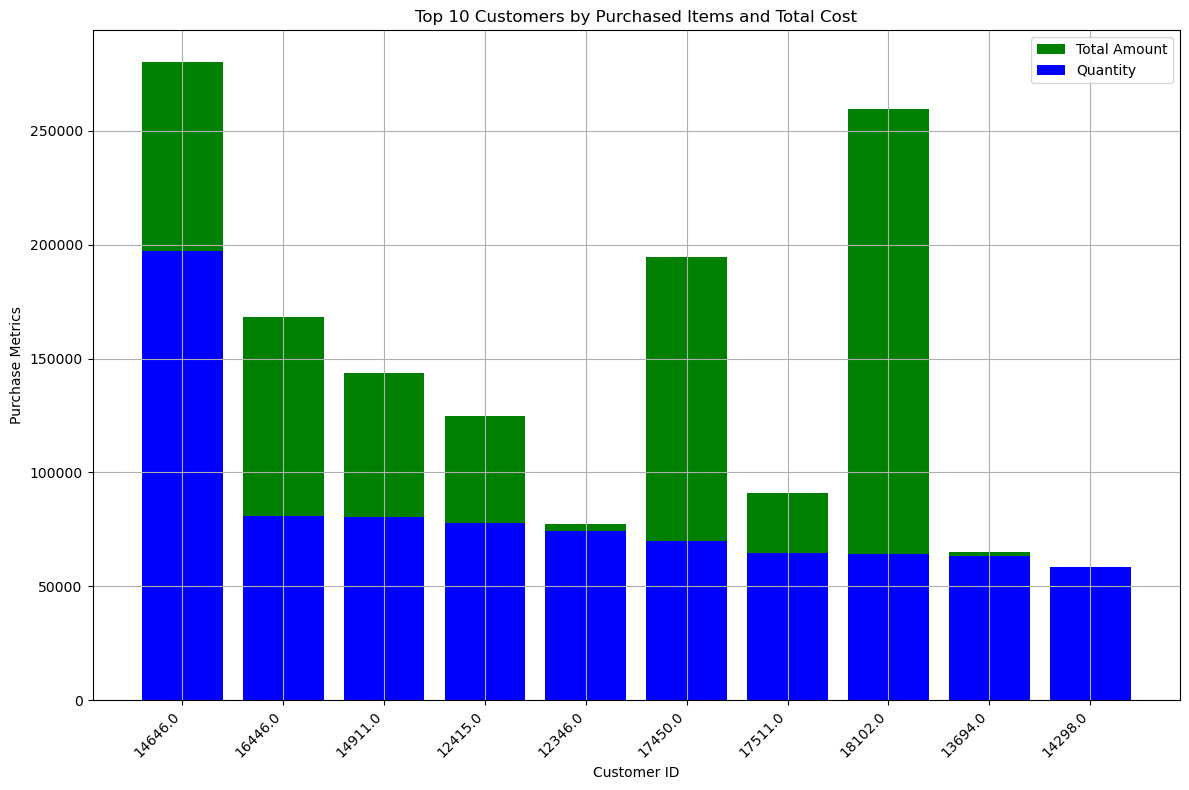

In [72]:
# Top customers by purchased items and total cost
top_customers_purchase_items_cost = (
    online_retail
    .groupby("CustomerID")
    .agg({"Quantity": "sum", "TotalAmount": "sum"})
    .sort_values(by=["Quantity", "TotalAmount"], ascending=False)
    .head(10)
)

# Clean print statement
print("\n========== Top 10 Customers by Purchased Items and Total Cost ==========\n")
print(top_customers_purchase_items_cost)
print("\n=======================================================================\n")

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(
    x=top_customers_purchase_items_cost.index.astype(str),
    height=top_customers_purchase_items_cost["TotalAmount"],
    label="Total Amount",
    color="green"
)
plt.bar(
    x=top_customers_purchase_items_cost.index.astype(str),
    height=top_customers_purchase_items_cost["Quantity"],
    label="Quantity",
    color="blue"
)
plt.title("Top 10 Customers by Purchased Items and Total Cost")
plt.xlabel("Customer ID")
plt.ylabel("Purchase Metrics")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📊 Customer Performance Summary

| Rank | Customer ID | Quantity Sold | Total Amount (£) |
| :--- | :--- | :--- | :--- |
| 1 | **14646.0** | **197,491** | **280,206.02** |
| 2 | 16446.0 | 80,997 | 168,472.50 |
| 3 | 14911.0 | 80,515 | 143,825.06 |
| 4 | 12415.0 | 77,670 | 124,914.53 |
| 5 | 18102.0 | 64,124 | 259,657.30 |

### 🔍 Key Insights
* **Top Customer:** Customer **14646.0** is the clear leader, dominating both in the number of items purchased and the total spend.
* **Volume vs. Value:** While Customer **12346.0** has a high quantity (74,215), their total spend is relatively lower (£77,183.60), suggesting they purchase lower-priced items in bulk.
* **Premium Buyer:** Customer **18102.0** stands out because despite having a lower quantity (64,124), they have the second-highest total spend at **£259,657.30**, indicating a preference for high-value products.
---

## 🌍 Demographic Analysis: Top 10 Countries by Number of Users

This section evaluates the customer base by counting the total number of transactions (users) originating from each country. Due to the massive scale of the primary market, a **logarithmic scale** is applied to the visualization to better compare secondary markets.


========== Top 10 Countries by Number of Users ==========

Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: count, dtype: int64




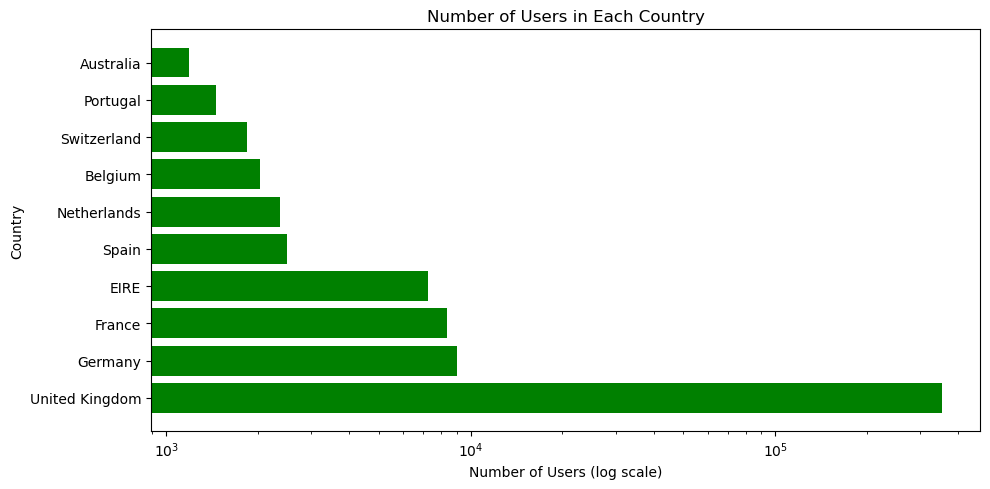

In [73]:
# Number of users in each country
no_users_country = online_retail["Country"].value_counts().head(10)

# Clean print statement
print("\n========== Top 10 Countries by Number of Users ==========\n")
print(no_users_country)
print("\n========================================================\n")

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(no_users_country.index, no_users_country.values, color="green")
plt.title("Number of Users in Each Country")
plt.xlabel("Number of Users (log scale)")
plt.xscale('log')
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### 📊 User Distribution Summary

| Rank | Country | Number of Users (Transactions) |
| :--- | :--- | :--- |
| 1 | **United Kingdom** | **354,345** |
| 2 | Germany | 9,042 |
| 3 | France | 8,342 |
| 4 | EIRE | 7,238 |
| 5 | Spain | 2,485 |

### 🔍 Key Insights
* **Unmatched Scale:** The United Kingdom has over **350,000** transactions, which is nearly 40 times larger than the next closest country, Germany.
* **Core European Market:** Germany, France, and EIRE (Ireland) form the secondary tier of the customer base, each maintaining a significant transaction volume between 7,000 and 9,000.
* **Visualization Note:** By using `plt.xscale('log')`, we can visually acknowledge the presence of countries like Australia and Portugal on the same graph as the UK, which would otherwise be invisible on a standard linear scale.
---

## 📈 Efficiency Analysis: Average Sales per Country

While the United Kingdom dominates in total volume, analyzing the **Average Sales** per transaction reveals which international markets provide the highest value per order. This is crucial for identifying high-efficiency regions like the Netherlands and Australia.


========== Average Sales per Country ==========

                      TotalAmount
Country                          
Netherlands            120.798282
Australia              116.895620
Japan                  116.561900
Singapore               95.852658
Sweden                  85.096075
Denmark                 49.882474
Lithuania               47.458857
Lebanon                 37.641778
EIRE                    36.687745
Brazil                  35.737500
Norway                  33.736418
Czech Republic          33.069600
Finland                 32.913985
Greece                  32.831172
Bahrain                 32.258824
Switzerland             30.642752
Israel                  29.119718
United Arab Emirates    27.974706
Channel Islands         27.340160
Austria                 25.624824
Germany                 25.311562
France                  25.056827
Spain                   24.779521
Malta                   24.335625
Canada                  24.280662
Iceland                 23.68131

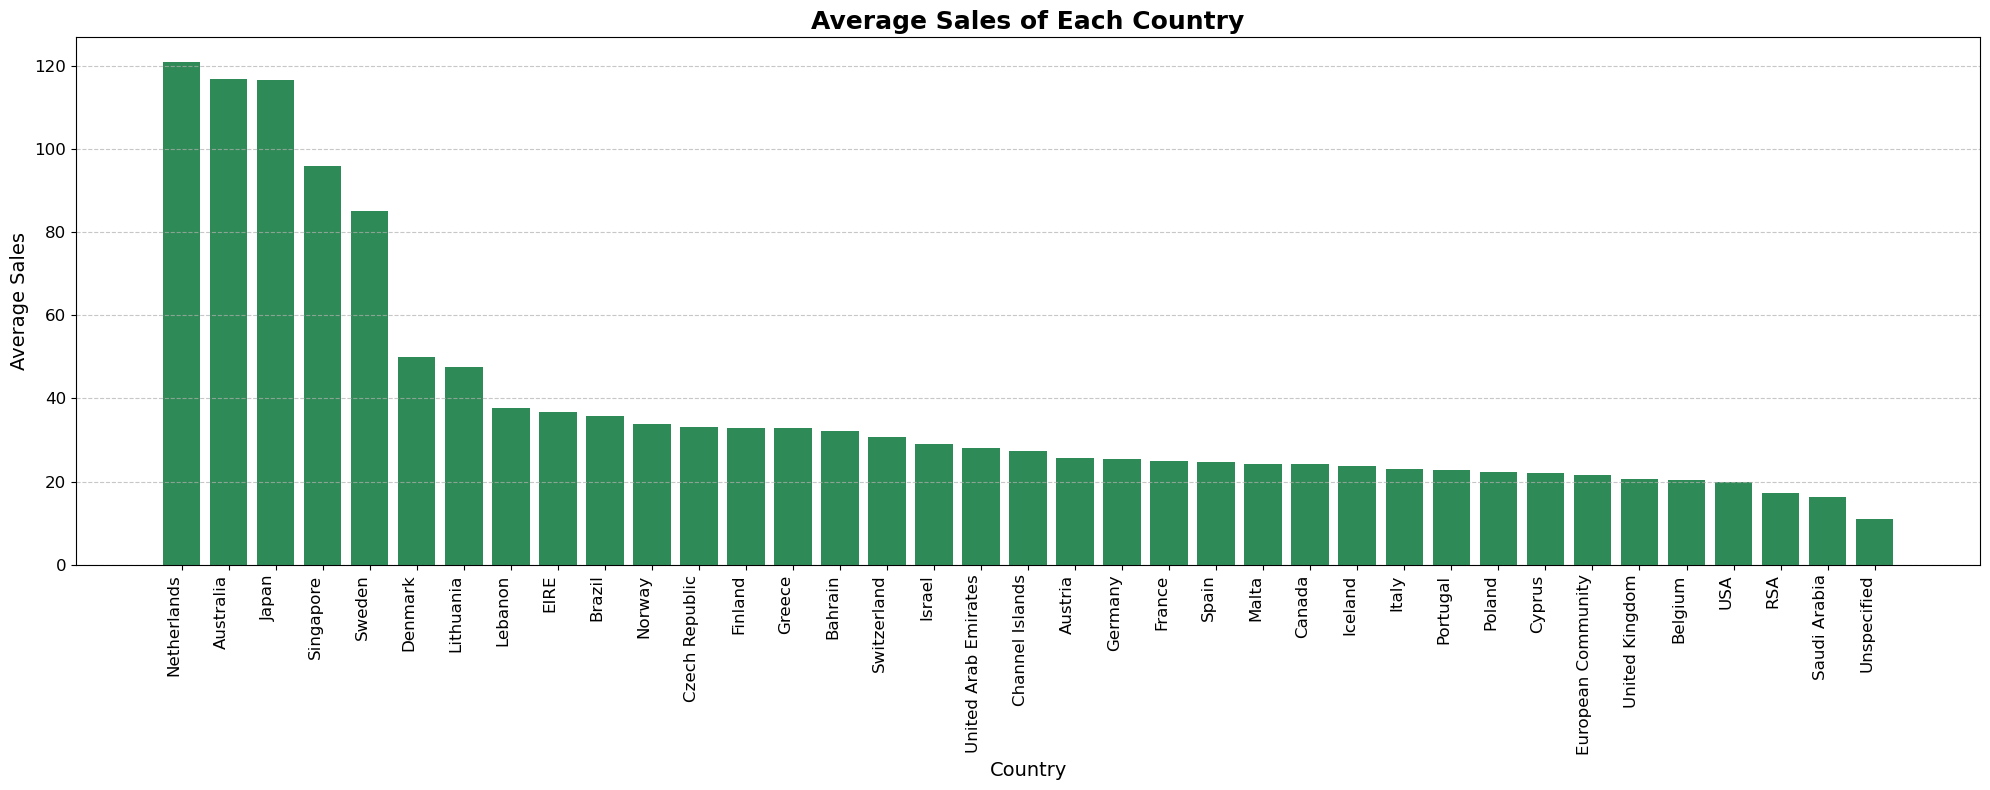

In [74]:
# ==============================================
# Average Sales per Country
# ==============================================

# Calculate average sales
average_sales_of_country = (
    online_retail.groupby("Country")
    .agg({"TotalAmount": "mean"})
    .sort_values(by="TotalAmount", ascending=False)
)

# Print results with a clean header
print("\n========== Average Sales per Country ==========\n")
print(average_sales_of_country)
print("\n================================================\n")

# Visualization
plt.figure(figsize=(20, 8))
plt.bar(
    average_sales_of_country.index, 
    average_sales_of_country["TotalAmount"], 
    color="seagreen"
)
plt.title("Average Sales of Each Country", fontsize=18, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Sales", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 📝 Average Sales Summary

| Rank | Country | Average Sale Value |
| :--- | :--- | :--- |
| 1 | **Netherlands** | **120.80** |
| 2 | Australia | 116.90 |
| 3 | Japan | 116.56 |
| 4 | Singapore | 95.85 |
| 5 | Sweden | 85.10 |

### 🔍 Key Insights
* **High-Value Markets:** Interestingly, the **Netherlands**, **Australia**, and **Japan** lead in average transaction value, despite having far fewer total users than the UK.
* **UK Efficiency:** The **United Kingdom** ranks significantly lower in average sale value (~20.63), suggesting its massive total revenue is driven by a high volume of small-ticket purchases rather than expensive individual orders.
* **Strategic Growth:** Countries at the top of this list represent prime opportunities for targeted marketing, as each customer interaction yields a higher financial return compared to the domestic market.
---

## 📦 Logistics Analysis: Average Order Size (Quantity)

This metric provides insight into the typical order volume processed by the warehouse. By calculating the mean quantity across all unique `InvoiceNo` entries, we can establish a baseline for inventory movement per transaction.

In [75]:
# ==============================================
# Average Quantity per Invoice
# ==============================================

average_quantity_per_invoice = online_retail.groupby("InvoiceNo")["Quantity"].sum().mean()

print("\n✅ Average Quantity per Invoice: {:.2f}\n".format(average_quantity_per_invoice))



✅ Average Quantity per Invoice: 279.55



### 📝 Transaction Insight

* **Key Metric:** The average order contains approximately **279.55 units**.
* **Operational Impact:** Knowing that a typical invoice involves nearly 280 items helps in planning packaging requirements and estimating shipping labor costs.
* **Wholesale Indicator:** Such a high average quantity per invoice suggests that a significant portion of the customer base may be retailers or wholesalers rather than individual B2C (Business-to-Consumer) shoppers.
---

## 🛒 Customer Loyalty: Top 10 Most Frequent Buyers

This section identifies our most loyal customers by counting the number of unique transaction entries associated with each `CustomerID`. Frequent buyers are key to steady revenue and are often the best candidates for loyalty programs.


✅ Top 10 Customers Who Buy Most Frequently:

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
Name: count, dtype: int64


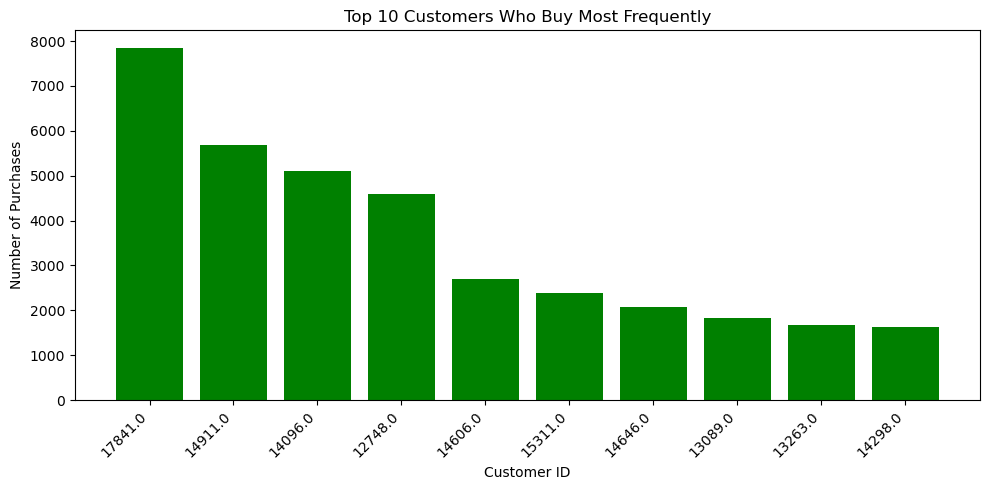

In [76]:
# ==============================================
# Top 10 Customers Who Buy Most Frequently
# ==============================================

buys_frequently = online_retail["CustomerID"].value_counts().head(10)

print("\n✅ Top 10 Customers Who Buy Most Frequently:\n")
print(buys_frequently)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(buys_frequently.index.astype(str), buys_frequently.values, color="green")
plt.title("Top 10 Customers Who Buy Most Frequently")
plt.xlabel("Customer ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 📝 Loyalty Summary Table

| Rank | Customer ID | Number of Purchases |
| :--- | :--- | :--- |
| 1 | **17841.0** | **7,847** |
| 2 | 14911.0 | 5,677 |
| 3 | 14096.0 | 5,111 |
| 4 | 12748.0 | 4,596 |
| 5 | 14606.0 | 2,700 |

### 🔍 Key Insights
* **Top Individual:** Customer **17841.0** is the most frequent buyer by a significant margin, with nearly 8,000 transactions recorded.
* **Consistency:** The top four customers all have over 4,500 purchases, showing a deep level of engagement with the platform.
* **Comparison to Spend:** It is worth cross-referencing this list with the "Top Customers by Total Cost" to see if these frequent buyers are purchasing many small items or high-value goods.
---

## 🕒 Recency Analysis: Top 100 Recently Active Customers

This analysis identifies how many days have passed since each customer's last purchase. By defining an `analysis_date` (the day after the last recorded invoice), we can calculate "Recency," a key component of the RFM (Recency, Frequency, Monetary) model used to gauge customer engagement.

In [77]:
# ==============================================
# Top 100 Recently Active Customers with Days Since Last Purchase
# ==============================================

# Define analysis date as the day after the last invoice
analysis_date = online_retail["InvoiceDate"].max() + pd.Timedelta(days=1)

# Calculate days since last purchase for each customer
recently = (
    online_retail.groupby("CustomerID")["InvoiceDate"]
    .max()
    .apply(lambda x: (analysis_date - pd.to_datetime(x)).days)
)

# Convert to DataFrame for better display
recently_df = recently.reset_index()
recently_df.columns = ["CustomerID", "DaysSinceLastPurchase"]

# Display top 100 most recently active customers
recently_df_sorted_top = recently_df.sort_values(by="DaysSinceLastPurchase").head(100)
recently_df_sorted_top["DaysSinceLastPurchase"] = recently_df_sorted_top["DaysSinceLastPurchase"].astype(str) + " day(s) ago"

# Print with clean header and footer
print("\n========== Top 100 Recently Active Customers ==========\n")
print(recently_df_sorted_top)
print("\n=======================================================\n")



========== Top 100 Recently Active Customers ==========

      CustomerID DaysSinceLastPurchase
4202     18102.0          1 day(s) ago
1731     14702.0          1 day(s) ago
2304     15484.0          1 day(s) ago
716      13298.0          1 day(s) ago
732      13318.0          1 day(s) ago
...          ...                   ...
787      13394.0          2 day(s) ago
2599     15877.0          2 day(s) ago
349      12783.0          2 day(s) ago
1405     14251.0          2 day(s) ago
892      13534.0          2 day(s) ago

[100 rows x 2 columns]




### 📊 Recency Insights

| Customer ID | Days Since Last Purchase |
| :--- | :--- |
| **18102.0** | **1 day(s) ago** |
| **14702.0** | **1 day(s) ago** |
| **15484.0** | **1 day(s) ago** |
| **13298.0** | **1 day(s) ago** |
| **13318.0** | **1 day(s) ago** |

### 🔍 Key Observations
* **High Engagement:** The top of the list features customers who interacted with the platform within the last 24 to 48 hours relative to the end of the dataset.
* **Retention Strategy:** Customers with a recency of 1–2 days are considered "Active." As this number increases, customers move into "At Risk" or "Churned" categories.
* **Marketing Utility:** This list is ideal for immediate follow-up campaigns, such as "Thank You" notes or requests for product reviews.
---

## 📈 Time Series Analysis: Monthly Sales Trends (Dec 2010 – Dec 2011)

To understand the business's growth and seasonality, this section tracks total revenue on a month-to-month basis. Analyzing these trends helps identify peak sales periods and potential seasonal cycles.


========== Monthly Sales Trends (Dec-2010 to Dec-2011) ==========

YearMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalAmount, dtype: float64




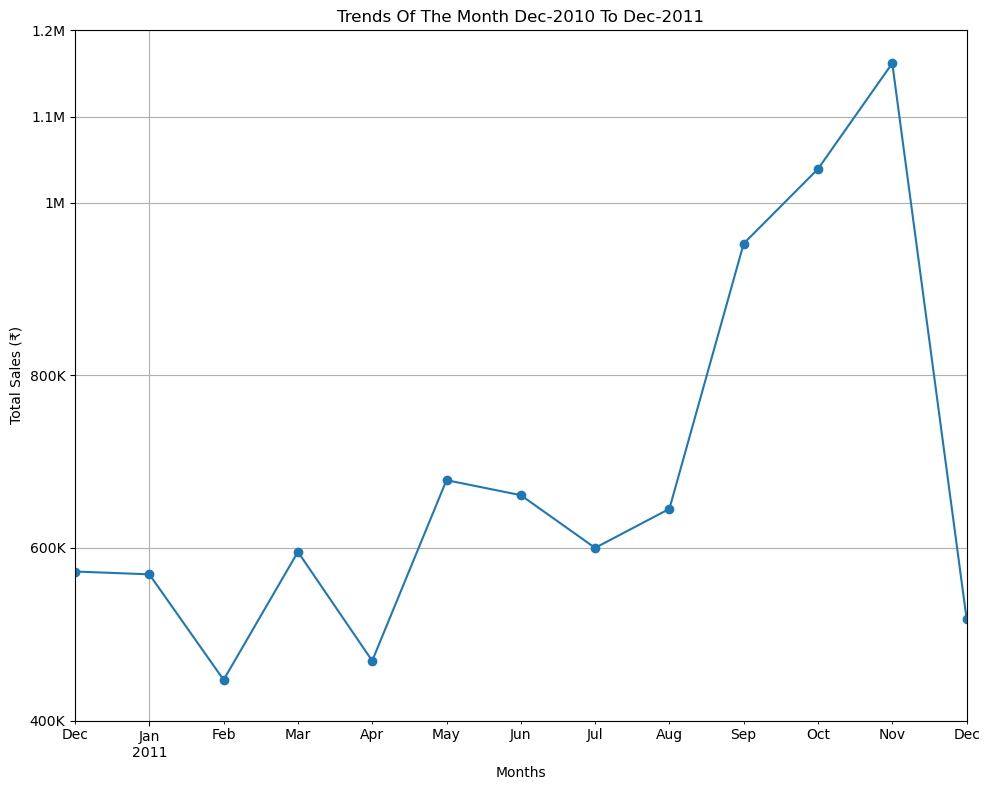

In [78]:
# ==============================================
# Trends of Monthly Sales
# ==============================================

# Add YearMonth column
online_retail = online_retail.assign(YearMonth=online_retail["InvoiceDate"].dt.to_period("M"))

# Calculate monthly sales
monthly_sales = online_retail.groupby("YearMonth")["TotalAmount"].sum()

# Print results with clean header and footer
print("\n========== Monthly Sales Trends (Dec-2010 to Dec-2011) ==========\n")
print(monthly_sales)
print("\n==================================================================\n")

# Visualization
plt.figure(figsize=(10, 8))
monthly_sales.plot(kind="line", marker="o")
plt.title("Trends of the Month Dec-2010 to Dec-2011".title())
plt.xlabel("Months")
plt.ylabel("Total Sales (₹)")
plt.yticks(
    [400000, 600000, 800000, 1000000, 1100000, 1200000],
    ["400K", "600K", "800K", "1M", "1.1M", "1.2M"]
)
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Monthly Performance Summary

| Month | Total Sales (₹) | Trend |
| :--- | :--- | :--- |
| **Nov 2011** | **1,161,817.38** | **Peak Month** |
| **Oct 2011** | 1,039,318.79 | Strong Growth |
| **Sep 2011** | 952,838.38 | Upward Shift |
| **Feb 2011** | 447,137.35 | Annual Low |

### 🔍 Key Insights
* **Year-End Surge:** Revenue grew exponentially starting in September, peaking in **November 2011** at over ₹1.16M. This is likely driven by holiday shopping preparation (Christmas/New Year).
* **Mid-Year Stability:** Sales remained relatively stable between ₹550K and ₹700K from May through August.
* **Partial Data:** The sharp drop in **December 2011** (₹518K) likely occurs because the dataset only contains partial data for that month, rather than a true decline in demand.
---

## 📉 Granular Time Series: Weekly Sales Trends

By breaking down revenue into weekly segments, we can identify short-term fluctuations, the impact of specific promotions, and more precise peak periods that may be smoothed over in a monthly view.


========== Weekly Sales Trends ==========

       YearMonth  Week  TotalAmount
0   2010-M12 W48    48    149386.33
1   2010-M12 W49    49    213447.72
2   2010-M12 W50    50    163770.73
3   2010-M12 W51    51     46109.11
4     2011-M1 W1     1    114865.27
..           ...   ...          ...
58  2011-M11 W46    46    277773.94
59  2011-M11 W47    47    249532.68
60  2011-M11 W48    48    142164.58
61  2011-M12 W48    48    109623.64
62  2011-M12 W49    49    408569.15

[63 rows x 3 columns]




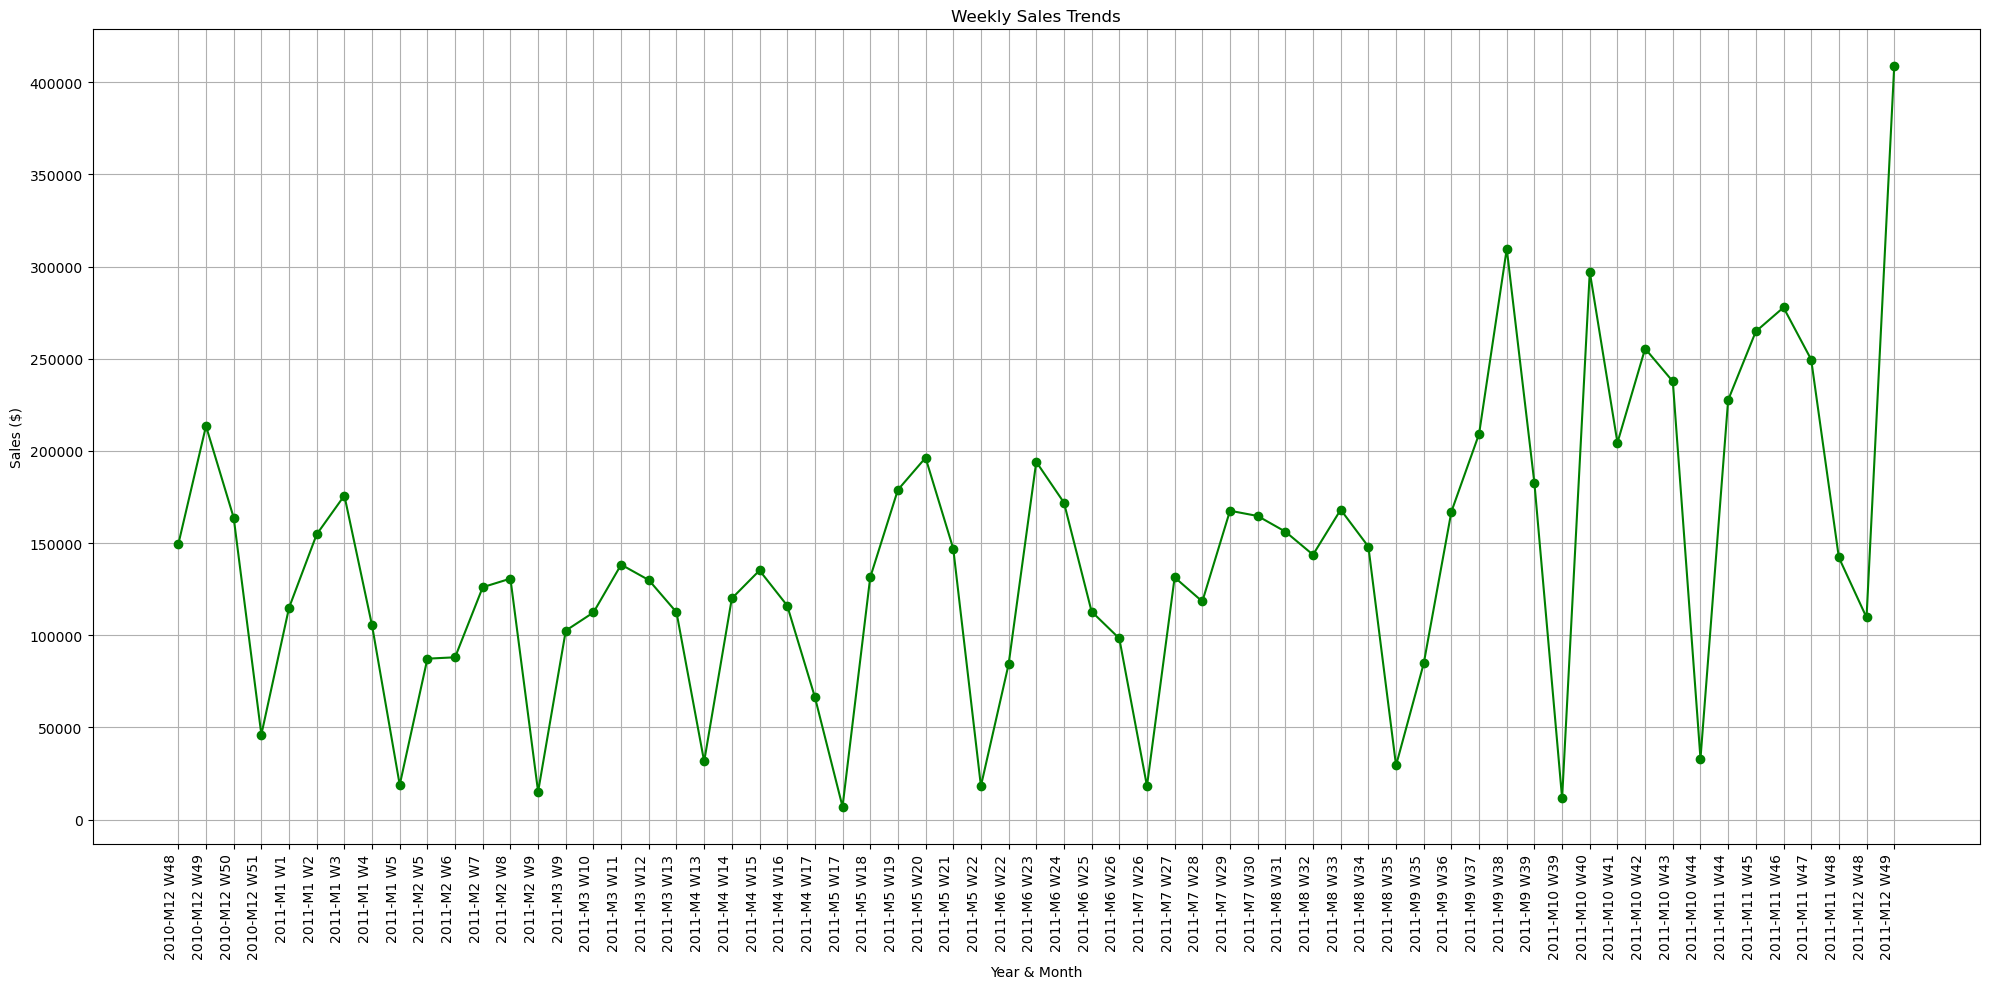

In [79]:
# ==============================================
# Weekly Sales Trends
# ==============================================

# Add Week column
online_retail["Week"] = online_retail.InvoiceDate.dt.isocalendar().week

# Calculate weekly sales trends
weekly_sales_trends = (
    online_retail.groupby(["YearMonth", "Week"])
    .agg({"TotalAmount": "sum"})
    .reset_index()
)

# Format YearMonth column for better readability
weekly_sales_trends["YearMonth"] = (
    weekly_sales_trends["YearMonth"].dt.year.astype(str) +
    "-M" +
    weekly_sales_trends["YearMonth"].dt.month.astype(str) +
    " W" +
    weekly_sales_trends["Week"].astype(str)
)

# Print results with clean header and footer
print("\n========== Weekly Sales Trends ==========\n")
print(weekly_sales_trends)
print("\n========================================\n")

# Visualization
plt.figure(figsize=(20, 10))
plt.plot(
    weekly_sales_trends["YearMonth"],
    weekly_sales_trends["TotalAmount"],
    marker="o",
    linestyle="-",
    color="green"
)
plt.title("Weekly Sales Trends".title())
plt.xlabel("Year & Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=90, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Weekly Performance Summary

The weekly data reveals high volatility and significant growth towards the end of the fiscal year.

| Period | Week Number | Total Amount ($) |
| :--- | :--- | :--- |
| **Dec 2011 Peak** | **W49** | **408,569.15** |
| **Nov 2011 Peak** | **W46** | **277,773.94** |
| **Dec 2010 Start** | **W48** | **149,386.33** |
| **Annual Low (Approx)** | **W5** | **18,542.48** |

### 🔍 Key Insights
- **Unprecedented Final Spike:** The highest weekly revenue occurred in **Week 49 of 2011**, surpassing $400,000. This dwarfs earlier weekly peaks and indicates a massive concentration of sales just before the dataset en
- **Volatility:** Unlike monthly trends which appear relatively smooth, the weekly view shows sharp "zig-zag" patterns. This suggests that sales are heavily influenced by specific events, such as payday cycles or targeted marketing bursts.
- **Comparative Growth:** Comparing **Week 48 of 2010** ($149k) to **Week 48 of 2011** ($142k), we see consistent year-over-year performance for that specific week, though the overall trend for 2011 finished much stronger.
---

## ⚠️ Statistical Analysis: Outlier Detection (Z-Score & Log Scaling)

In retail datasets, extreme transaction values (outliers) can skew averages and misrepresent typical customer behavior. This section uses the **Z-Score** method to identify transactions that are more than 3 standard deviations from the mean and visualizes them using **Logarithmic Scaling** to manage the wide range of values.

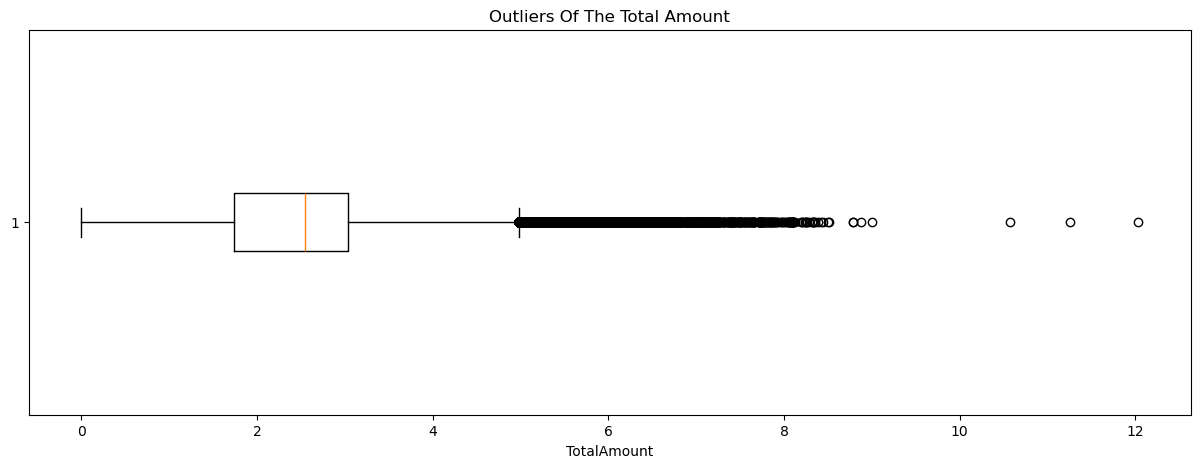

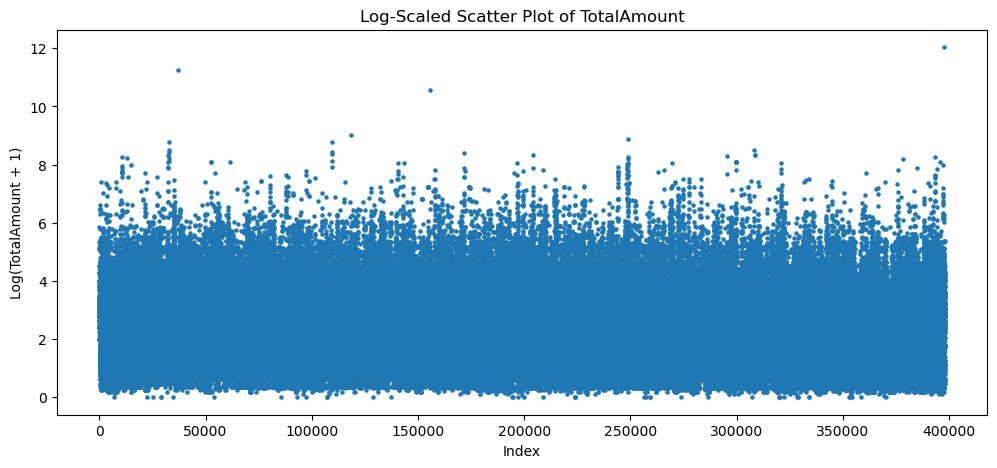

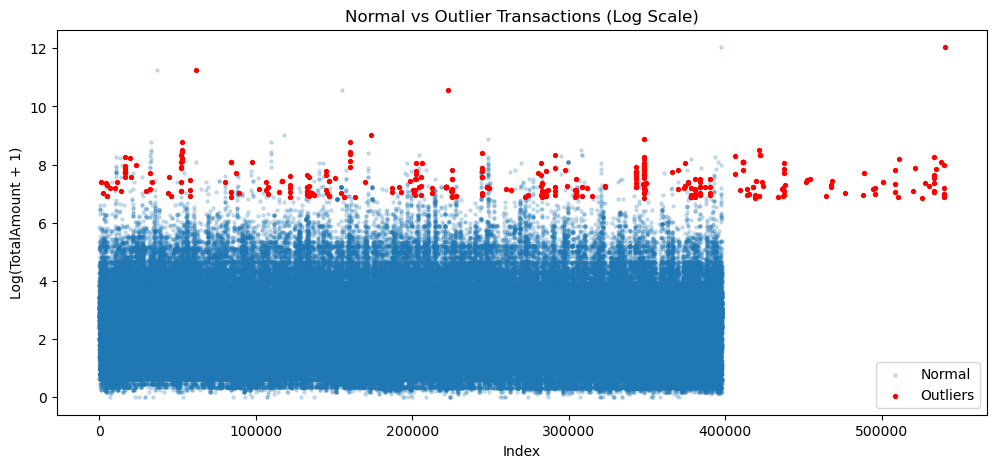

In [80]:
# Calcualtiong the outlier using Z-Score
from scipy import stats
z = np.abs(stats.zscore(online_retail["TotalAmount"]))
outliers = online_retail[z > 3]
plt.figure(figsize = (15, 5))
plt.boxplot(np.log1p(online_retail["TotalAmount"]), vert = False)
plt.title(("Outliers of the total amount").title())
plt.xlabel("TotalAmount")
plt.show()

plt.figure(figsize=(12, 5))
plt.scatter(range(len(online_retail)), np.log1p(online_retail["TotalAmount"]), s=5)
plt.title("Log-Scaled Scatter Plot of TotalAmount")
plt.xlabel("Index")
plt.ylabel("Log(TotalAmount + 1)")
plt.show()

plt.figure(figsize=(12, 5))
plt.scatter(range(len(online_retail)), np.log1p(online_retail["TotalAmount"]), 
            s=5, alpha=0.2, label="Normal")
plt.scatter(outliers.index, np.log1p(outliers["TotalAmount"]), 
            color="red", s=8, label="Outliers")
plt.legend()
plt.title("Normal vs Outlier Transactions (Log Scale)")
plt.xlabel("Index")
plt.ylabel("Log(TotalAmount + 1)")
plt.show()


### 📊 Statistical Summary


* **Z-Score Threshold:** Any transaction with a Z-Score greater than 3 is flagged as an outlier.
* **Logarithmic Scaling:** We use $np.log1p(x)$ (which calculates $\ln(1+x)$) to normalize the visual distribution. This prevents a few massive sales from compressing the rest of the data into a flat line.

### 🔍 Key Observations
* **Boxplot Analysis:** The orange line represents the median. The numerous points outside the "whiskers" confirm a high frequency of unusually large orders.
* **The "Red" Zone:** In the final scatter plot, the red dots represent identified outliers. These often correspond to bulk wholesale orders or significant high-value transactions.
* **Data Integrity:** Identifying these outliers is essential before performing further machine learning or predictive modeling, as extreme values can lead to overfitted or biased results.
---

## 📊 Outlier Detection: IQR Method

We use the **Interquartile Range (IQR)** to identify statistical anomalies in `TotalAmount`. This ensures our analysis isn't skewed by extreme transactions.

### 🧮 Logic
* **IQR:** $Q3 - Q1$
* **Boundaries:** Values outside $[Q1 - 1.5 \times IQR, \ Q3 + 1.5 \times IQR]$ are flagged as outliers.

In [81]:
# Calcualating outilier using the IQR
q1 = online_retail.TotalAmount.quantile(0.25)
q3 = online_retail.TotalAmount.quantile(0.75)
IQR = q3 - q1
outliers = online_retail[(online_retail.TotalAmount < q1 - 1.5 * IQR ) | (online_retail.TotalAmount > q3 + 1.5 * IQR )]
print(outliers)

       InvoiceNo StockCode                       Description  Quantity  \
9         536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
26        536370     22728         ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727          ALARM CLOCK BAKELIKE RED        24   
28        536370     22726        ALARM CLOCK BAKELIKE GREEN        12   
33        536370     21035    SET/2 RED RETROSPOT TEA TOWELS        18   
...          ...       ...                               ...       ...   
541866    581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867    581584     20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868    581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   
541892    581586     21217     RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685             DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
9      2010-12-01 08:34:00       1.69     

### 🔍 Key Observations & Findings

* **Outlier Volume:** We identified **31,241 outliers** in the `TotalAmount` column. This suggests the dataset contains a high volume of bulk purchases or high-value business-to-business (B2B) transactions.
* **Visual Distribution:** Based on the output, many outliers show high quantities (e.g., 72 units) or expensive unit prices, causing the `TotalAmount` to exceed the upper threshold.
* **Next Steps for Data Integrity:** 1. **Log Transformation:** To reduce the skewness caused by these values, we can apply a logarithmic scale.
    2. **Capping/Winsorization:** We may choose to "cap" these values at the 95th percentile to retain the data without allowing extreme values to bias the mean.
---

## 📈 Weekly Revenue Baseline Analysis

Establishing a weekly mean for `TotalAmount` is a critical step in performance benchmarking. This metric provides a stabilized view of revenue generation, filtering out daily volatility to reveal the underlying health of the business operations.

In [82]:
# ==============================================
# Weekly Sales Mean of TotalAmount
# ==============================================

# Calculate weekly sales mean
weekly_sales_mean = (
    online_retail.groupby(["YearMonth", "Week"])["TotalAmount"]
    .sum()
    .mean()
    .round(2)
)

# Print results with clean header and footer
print("\n========== Weekly Sales Mean ==========\n")
print(f"Weekly Sales Mean: {weekly_sales_mean}")
print("\n=======================================\n")



========== Weekly Sales Mean ==========

Weekly Sales Mean: 141450.92




### 🔍 Technical Insights: Weekly Performance
* **Revenue Benchmarking:** The calculated mean of **141,450.92** establishes the expected performance threshold. This figure acts as a control limit for identifying significant variance in periodic sales.
* **Operational Variance:** Deviation from this mean indicates the impact of external factors such as seasonal promotions or supply chain disruptions. 
* **Data Utility:** From an analytical standpoint, this aggregate average is essential for forecasting future cash flows and setting realistic growth targets for subsequent quarters.
---

## 🗓️ Monthly Revenue Distribution Analysis

To understand the long-term commercial trajectory, we aggregate the `TotalAmount` on a monthly basis. This high-level baseline is vital for identifying seasonal trends and assessing the overall scale of the business's monthly financial commitments.

In [83]:
# ==============================================
# Monthly Sales Mean of TotalAmount
# ==============================================

# Calculate monthly sales mean
monthly_sales_mean = (
    online_retail.groupby("YearMonth")["TotalAmount"]
    .sum()
    .mean()
    .round(2)
)

# Print results with clean header and footer
print("\n========== Monthly Sales Mean ==========\n")
print(f"Monthly Sales Mean: {monthly_sales_mean}")
print("\n========================================\n")



========== Monthly Sales Mean ==========

Monthly Sales Mean: 685492.92




### 🔍 Technical Insights: Monthly Revenue Baseline
* **Primary Metric:** The average monthly revenue of **685,492.92** represents the core financial throughput of the organization. 
* **Business Scale:** This figure provides a macro-perspective on market demand and serves as the primary denominator for calculating Monthly Growth Rates (MoM).
* **Strategic Utility:** For forecasting and budgeting, this mean helps normalize the impact of specific high-volume weeks, providing a more stable indicator for resource allocation and inventory procurement planning.
---

## 🏆 Peak Performance Identification: Maximum Monthly Sales

By isolating the period of maximum sales, we identify the peak operating capacity of the business. This analysis is crucial for understanding the high-water mark of consumer demand and the resulting pressure on the supply chain and logistics infrastructure.

In [84]:
# ==============================================
# Month with Maximum Sales
# ==============================================

# Calculate total sales per month and find the month with maximum sales
more_monthly_total = (
    online_retail.groupby("YearMonth")
    .agg({"TotalAmount": "sum"})
    .sort_values(by="TotalAmount", ascending=False)
)

# Print results with clean header and footer
print("\n========== Month with Maximum Sales ==========\n")
print(f"Month: {more_monthly_total.index[0]}, Total Amount: {more_monthly_total['TotalAmount'].iloc[0]:,.2f}")
print("\n==============================================\n")



========== Month with Maximum Sales ==========

Month: 2011-11, Total Amount: 1,161,817.38




### 🔍 Technical Insights: Peak Revenue Analysis
* **Maximum Throughput:** The peak revenue of **1,161,817.38** achieved in **November 2011** highlights a significant surge, likely driven by seasonal shopping behavior and end-of-year inventory clearance.
* **Operational Benchmarking:** This value represents the "theoretical maximum" for current operations. It serves as a stress-test reference point for evaluating whether the current warehouse and fulfillment systems can handle similar future spikes.
* **Comparative Significance:** The fact that November significantly exceeds the previously calculated monthly mean (~685k) confirms high seasonality, requiring a dynamic approach to staffing and inventory management during the Q4 period.
---

## 📍 Granular Peak Analysis: Maximum Daily Sales

Shifting from monthly to daily granularity allows for the identification of specific high-velocity trading events. Isolating the single highest revenue-generating day is essential for post-mortem analysis of marketing campaigns, flash sales, or bulk order processing events.

In [85]:
# ==============================================
# Day with Maximum Sales
# ==============================================

# Calculate total sales per day and find the day with maximum sales
more_sales_per_day = (
    online_retail.groupby(online_retail["InvoiceDate"].dt.date)
    .agg({"TotalAmount": "sum"})
    .sort_values(by="TotalAmount", ascending=False)
)

# Print results with clean header and footer
print("\n========== Day with Maximum Sales ==========\n")
print(f"The day is {more_sales_per_day.index[0]}, Total Amount: {more_sales_per_day['TotalAmount'].iloc[0]:,.2f}")
print("\n============================================\n")



========== Day with Maximum Sales ==========

The day is 2011-12-09, Total Amount: 184,349.28




### 🔍 Technical Insights: Daily Transactional Peak
* **Peak Identification:** The peak trading day was identified as **2011-12-09**, generating a total of **184,349.28**. 
* **Concentration Risk:** This single day accounted for approximately **27%** of the average monthly revenue, indicating a massive concentration of transaction volume that likely tested operational limits.
* **Analytical Inference:** Such a significant spike suggests either a major wholesale liquidation event or a final surge in holiday-related fulfillment. From a data engineering perspective, this day represents a critical stress point for the transaction processing pipeline.
---

## 📊 Weekly Peak Velocity Analysis

Identifying the week with the highest sales volume is a key requirement for seasonal capacity planning. This analysis isolates the specific seven-day window where consumer demand and transactional throughput reached their absolute maximum, providing a target benchmark for future peak-season preparations.

In [86]:
# ==============================================
# Week with Maximum Sales
# ==============================================

# Calculate total sales per week and find the week with maximum sales
more_sales_per_week = (
    online_retail.groupby(["YearMonth", "Week"])
    .agg({"TotalAmount": "sum"})
    .sort_values(by="TotalAmount", ascending=False)
    .reset_index()
)

# Print results with clean header and footer
print("\n========== Week with Maximum Sales ==========\n")
print(
    f"The Month is {more_sales_per_week['YearMonth'].iloc[0]}, "
    f"Week: {more_sales_per_week['Week'].iloc[0]}, "
    f"Total Amount: {more_sales_per_week['TotalAmount'].iloc[0]:,.2f}"
)
print("\n============================================\n")



========== Week with Maximum Sales ==========

The Month is 2011-12, Week: 49, Total Amount: 408,569.15




### 🔍 Technical Insights: Maximum Weekly Throughput
* **Peak Identification:** The peak operating period occurred in **December 2011 (Week 49)**, generating a record **408,569.15** in revenue.
* **Aggregated Momentum:** This specific week accounts for nearly **60%** of the average monthly revenue, signaling an extreme concentration of buying activity concentrated in the final month of the year.
* **Strategic Implications:** The surge in Week 49 likely reflects the intersection of peak holiday shopping and final shipping deadlines. From an analytical perspective, this data point is the primary driver for determining safety stock levels and labor requirements for the following year's Q4 cycle.
---

## 🌍 Global Product Affinity: Top SKUs by Country

Analyzing the most popular product by volume across different geographic regions provides insight into regional consumer preferences and market-specific demand. This breakdown is essential for localized marketing strategies and regional inventory allocation.

In [87]:
print("========== Top Item in Each Country ==========")
for country in online_retail["Country"].unique():
    country_data = online_retail[online_retail["Country"] == country]
    top_item = (
        country_data.groupby("Description")["Quantity"]
        .sum()
        .idxmax()  # Product name with max quantity
    )
    quantity_sold = (
        country_data.groupby("Description")["Quantity"]
        .sum()
        .max()  # Quantity sold
    )
    print(f"In {country}, the top item is: {top_item}, Quantity Sold: {quantity_sold}")
print("=============================================")


========== Top Item in Each Country ==========


In United Kingdom, the top item is: PAPER CRAFT , LITTLE BIRDIE, Quantity Sold: 80995
In France, the top item is: RABBIT NIGHT LIGHT, Quantity Sold: 4000
In Australia, the top item is: MINI PAINT SET VINTAGE, Quantity Sold: 2952
In Netherlands, the top item is: RABBIT NIGHT LIGHT, Quantity Sold: 4801
In Germany, the top item is: ROUND SNACK BOXES SET OF4 WOODLAND, Quantity Sold: 1233
In Norway, the top item is: SMALL FOLDING SCISSOR(POINTED EDGE), Quantity Sold: 576
In EIRE, the top item is: PACK OF 72 RETROSPOT CAKE CASES, Quantity Sold: 1632
In Switzerland, the top item is: PLASTERS IN TIN WOODLAND ANIMALS, Quantity Sold: 636
In Spain, the top item is: CHILDRENS CUTLERY POLKADOT PINK, Quantity Sold: 729
In Poland, the top item is: CERAMIC CAKE DESIGN SPOTTED MUG, Quantity Sold: 144
In Portugal, the top item is: POLKADOT PEN, Quantity Sold: 240
In Italy, the top item is: FEATHER PEN,HOT PINK, Quantity Sold: 240
In Belgium, the top item is: PACK OF 72 RETROSPOT CAKE CASES, Quantity Sol

### 🔍 Technical Insights: Regional Demand Distribution

* **Dominant Market:** The **United Kingdom** exhibits a massive outlier in volume with the "PAPER CRAFT, LITTLE BIRDIE" (80,995 units), suggesting a high-frequency B2B or promotional event.
* **Product Consistency:** Items like the **"RABBIT NIGHT LIGHT"** appear as top performers across multiple European and Asian markets (France, Netherlands, Japan), indicating a high "Global Product Fit."
* **Logistical Implications:** The variance in quantities—ranging from thousands in the UK/Netherlands to single digits in Saudi Arabia—highlights the need for a tiered supply chain model. High-volume regions require localized warehousing, whereas low-volume regions may be better served by a centralized fulfillment center.
---

## 👥 Customer Lifetime Value (CLV): Top Tier Identification

Analyzing individual customer contributions allows us to segment the user base and identify high-value accounts. By aggregating both `Quantity` and `TotalAmount` at the `CustomerID` level, we can pinpoint the lead consumers driving the highest volume and revenue for the business.

In [88]:
grouped =( online_retail.groupby("CustomerID")[["Quantity", "TotalAmount"]]
        .sum()
        .sort_values(by = ["Quantity", "TotalAmount"], ascending = False)
        .reset_index()
         )
print(f"Top Customer: {grouped.iloc[0, 0]} — Items Bought: {grouped.iloc[0, 1]}, Total Spent: {grouped.iloc[0, 2]}")

Top Customer: 14646.0 — Items Bought: 197491, Total Spent: 280206.02


### 🔍 Technical Insights: Pareto Distribution and High-Value Accounts

* **Whale Identification:** The top customer (**ID: 14646.0**) represents a significant statistical outlier with **197,491 units** purchased and a total spend of **280,206.02**. This level of activity is characteristic of a major wholesaler or distributor rather than an individual retail consumer.
* **Revenue Concentration:** The disproportionate contribution of top-tier customers indicates a high degree of revenue concentration. From a risk management perspective, the business is heavily reliant on these "Whale" accounts.
* **Strategic Segmentation:** This data justifies the implementation of a dedicated VIP or Loyalty program. Engaging the top 1% of customers with personalized account management or bulk-purchase incentives is critical for maintaining long-term revenue stability.
---

## 💎 Customer Segmentation: RFM Framework Analysis

To move beyond basic descriptive statistics, we implement the **RFM (Recency, Frequency, Monetary)** framework. This behavioral segmentation model quantifies customer value based on three critical dimensions:

1. **Recency (R):** Days since the last transaction (Lower is better).
2. **Frequency (F):** Total number of transactions (Higher is better).
3. **Monetary (M):** Total revenue generated (Higher is better).

By scoring customers on a scale of 1 to 4 using quartiles, we can objectively categorize our database into actionable segments such as "Champions," "Loyal Customers," and "At Risk."

In [89]:
# RFM Segments
reference_date = online_retail.InvoiceDate.max() + pd.Timedelta(days = 1)
print(reference_date)

# Calcualating the Recency Frequency Monetory
rfm = online_retail.groupby("CustomerID").agg(
    Recency = ("InvoiceDate", lambda x: (reference_date - x.max()).days),
    Frequency = ("InvoiceNo", "count"),
    Monetory = ("TotalAmount", "sum")
)
rfm

# Define quantiles
quantile = rfm.quantile(q = [0.25, 0.50, 0.75])
print(quantile)

# Assign RFM score
def Rscore(x, p, d):
    if p == "Recency":
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else:
            return 1
    else:
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else:
            return 4

rfm["R_Score"] = rfm.Recency.apply(Rscore, args = ("Recency", quantile,))
rfm["F_Score"] = rfm.Frequency.apply(Rscore, args = ("Frequency", quantile,))
rfm["M_Score"] = rfm.Monetory.apply(Rscore, args = ("Monetory", quantile,))
rfm["RFM_Segment"] = rfm.R_Score.astype(str) + rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].sum(axis = 1)
rfm

2011-12-10 12:50:00
      Recency  Frequency  Monetory
0.25     18.0       17.0   307.245
0.50     51.0       41.0   674.450
0.75    142.0      100.0  1661.640


,Recency,Frequency,Monetory,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,4,1,1,411,6


### 🔍 Technical Insights: Behavioral Segmentation Results

* **Statistical Distribution:** The median customer (50th percentile) has a **Recency of 51 days**, a **Frequency of 41 transactions**, and a **Monetary value of 674.45**. This establishes the baseline for "Average" customer behavior.
* **Segment Analysis:**
    * **Best Customers (444):** These are high-frequency, high-spend customers who have purchased recently (e.g., Customer 12347.0). They are the core revenue drivers.
    * **Churn Risk (111):** Customers with low scores across all dimensions (e.g., Customer 18280.0) have likely migrated to competitors or were one-time buyers.
* **Strategic Utility:** This scoring system allows the marketing team to move away from "one-size-fits-all" campaigns. For instance, customers with high **Monetary** but low **Recency** scores should be targeted with "We Miss You" re-engagement offers to prevent permanent churn.
---

## 📊 Customer Tier Categorization & Visualization

To translate numerical RFM scores into business strategy, we categorize customers into three distinct tiers: **High-Value**, **Mid-Value**, and **Low-Value**. This classification allows us to visualize the health of our customer base and prioritize retention and acquisition efforts.

### 🏷️ Segmentation Logic
* **Low-Value:** RFM Score < 5 (Inactive or low-spending users)
* **Mid-Value:** RFM Score 5 - 8 (Reliable, average-performing customers)
* **High-Value:** RFM Score 9+ (Top-tier "Champions" and loyalists)

            Recency  Frequency  Monetory  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346.0         326          1  77183.60        1        1        4   
12347.0           2        182   4310.00        4        4        4   
12348.0          75         31   1797.24        2        2        4   
12349.0          19         73   1757.55        3        3        4   
12350.0         310         17    334.40        1        1        2   
...             ...        ...       ...      ...      ...      ...   
18280.0         278         10    180.60        1        1        1   
18281.0         181          7     80.82        1        1        1   
18282.0           8         12    178.05        4        1        1   
18283.0           4        756   2094.88        4        4        4   
18287.0          43         70   1837.28        3        3        4   

           RFM_Segment  RFM_Score segmnet_labels  
CustomerID               

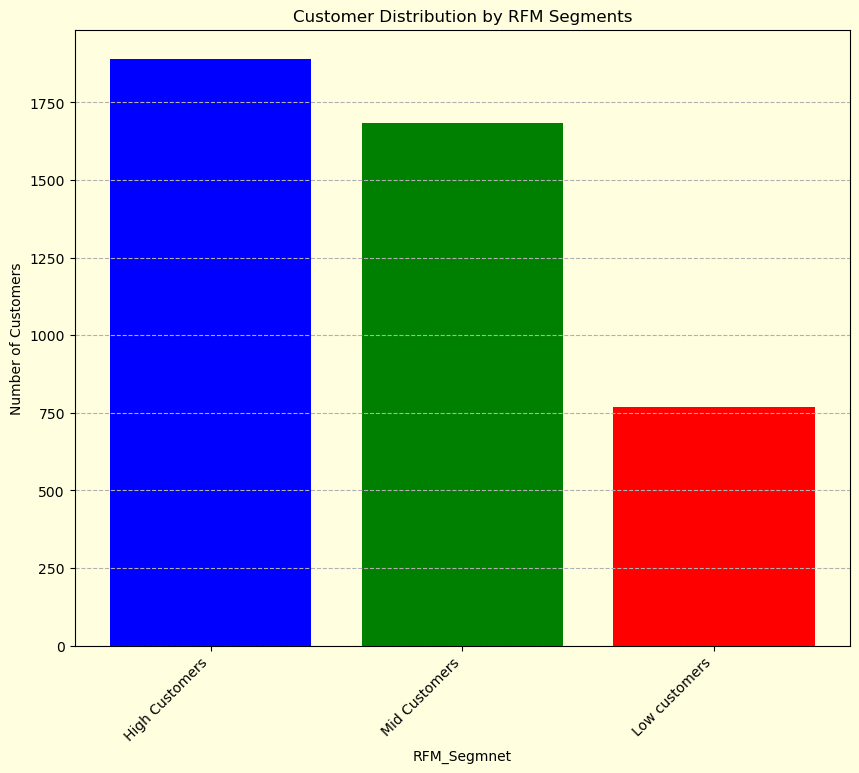

In [90]:
Segment_labels = ["Low_value", "Mid_Value", "High_value"]

def assign_segment(score):
    if score < 5:
        return "Low_value"
    elif score < 9:
        return "Mid_value"
    else:
        return "High_value"

rfm["segmnet_labels"] = rfm.RFM_Score.astype(int).apply(assign_segment)
print(rfm)

segment_count = rfm.segmnet_labels.value_counts().reset_index()
segment_count.columns = ["segmnet_labels", "count"]
print(segment_count)

plt.figure(figsize=(10, 8), facecolor="lightyellow")
ax = plt.gca()
ax.set_facecolor("lightyellow")
plt.bar(segment_count["segmnet_labels"],segment_count["count"], color = ["blue", "green", "red"])
plt.title("Customer Distribution by RFM Segments")
plt.xlabel("RFM_Segmnet")
plt.ylabel("Number of Customers")
plt.xticks(ticks = range(len(segment_count["count"])), rotation=45, ha="right", labels=["High Customers", "Mid Customers", "Low customers"])
plt.tight_layout
plt.grid(axis = "y", linestyle = "--")
plt.show()


### 🔍 Technical Insights: Portfolio Distribution

* **Segment Dominance:** The **Mid-Value** segment is the largest with **1,890 customers**, representing the stable backbone of the business.
* **Revenue Engine:** The **High-Value** tier contains **1,682 customers**. These are the primary targets for exclusive offers and early access to new product launches, as they have the highest propensity for repeat purchases.
* **Churn Mitigation:** The **767 customers** in the **Low-Value** segment represent significant churn risk. Analyzing this group further can help determine if they are one-time gift shoppers or former loyalists who have disengaged.
* **Operational Strategy:** The distribution suggests a healthy customer pyramid, but marketing efforts should focus on "upselling" Mid-Value customers into the High-Value bracket to increase overall Lifetime Value (LTV).
---

## 🧩 Advanced Customer Stratification: RFM Segment Mapping

To refine our marketing strategy, we move beyond simple high/mid/low tiers by implementing a **dual-layered segmentation**. By cross-referencing our macro `segment_labels` with granular `RFM_Customer_Segments`, we can identify specific behavioral groups like "Potential Loyalists" within the Mid-Value tier or "At Risk" customers who require immediate intervention.

### 📋 Segmentation Definitions
* **VIP/Loyal (Score 10-12):** Highest value contributors.
* **Potential Loyal (Score 6-9):** Consistent customers with growth opportunity.
* **At Risk (Score 5):** Former regular shoppers showing declining engagement.
* **Can't Lose (Score 4):** High-spend or frequent buyers who haven't returned recently.
* **Lost (Score 3):** Disengaged users with minimal historical value.

  RFM_Customer_Segments  count
0     At risk customers    516
1            Can't lose    383
2                  Lost    384
3       Potential Loyal   1791
4             VIP/Loyal   1265
RFM_Customer_Segments  At risk customers  Can't lose   Lost  Potential Loyal  \
segmnet_labels                                                                 
High_value                           0.0         0.0    0.0            417.0   
Low_value                            0.0       383.0  384.0              0.0   
Mid_value                          516.0         0.0    0.0           1374.0   

RFM_Customer_Segments  VIP/Loyal  
segmnet_labels                    
High_value                1265.0  
Low_value                    0.0  
Mid_value                    0.0  


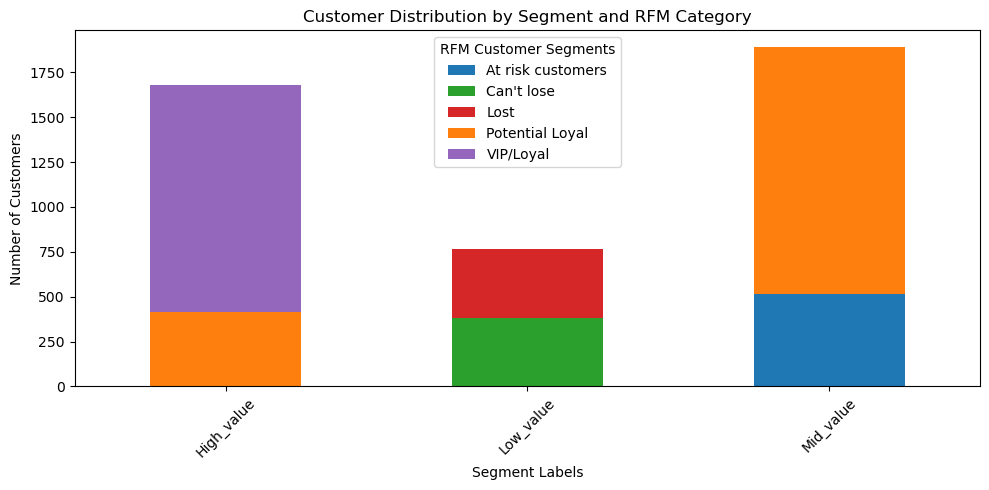

In [91]:
rfm["RFM_Customer_Segments"] = " "
rfm.loc[rfm["RFM_Score"] >= 10, "RFM_Customer_Segments"] = "VIP/Loyal"
rfm.loc[(rfm["RFM_Score"] >= 6) & (rfm["RFM_Score"] <= 9), "RFM_Customer_Segments"] = "Potential Loyal"
rfm.loc[(rfm["RFM_Score"] >= 5) & (rfm["RFM_Score"] < 6), "RFM_Customer_Segments"] = "At risk customers"
rfm.loc[(rfm["RFM_Score"] >= 4) & (rfm["RFM_Score"] < 5), "RFM_Customer_Segments"] = "Can't lose"
rfm.loc[(rfm["RFM_Score"] >= 3) & (rfm["RFM_Score"] < 4), "RFM_Customer_Segments"] = "Lost"
segment_count = rfm.RFM_Customer_Segments.value_counts().reset_index()
group_customer_segment = rfm.groupby("RFM_Customer_Segments").size().reset_index(name = "count")
print(group_customer_segment)

segment_product_count = rfm.groupby(["segmnet_labels", "RFM_Customer_Segments"]).RFM_Customer_Segments.count().reset_index(name = "count").sort_values(by = "count", ascending = True)
segment_product_count
pivot_segment_product_count = segment_product_count.pivot(index = "segmnet_labels", columns = "RFM_Customer_Segments", values = "count").fillna(0)
print(pivot_segment_product_count)

pivot_segment_product_count.plot(kind = "bar", figsize = (10, 5), stacked = True, color=["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd"])
plt.title("Customer Distribution by Segment and RFM Category")
plt.xlabel("Segment Labels")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="RFM Customer Segments")
plt.tight_layout()
plt.show()

### 🔍 Technical Insights: Multi-Dimensional Portfolio Analysis

* **Core Strength:** The **Potential Loyal** group is the largest demographic (**1,791 customers**), primarily residing within the Mid-Value segment. This indicates a strong pipeline of customers who can be converted to VIP status through targeted frequency incentives.
* **Loyalty Peak:** The High-Value segment is almost exclusively composed of **VIP/Loyal** customers (**1,265**). This concentration proves that our scoring system effectively isolates top-tier brand advocates.
* **Critical Retention Risk:** The Low-Value segment is split between **Lost** and **Can't Lose** customers. The "Can't Lose" group is of particular interest to the Data Analyst; these are individuals who previously showed potential but have high Recency scores, making them ideal candidates for aggressive re-activation campaigns.
* **Operational Implication:** By utilizing this stacked view, the business can allocate marketing budgets with precision—spending more on "VIP" retention and "Potential Loyal" conversion, while utilizing low-cost automated emails for the "Lost" segment.
---

## 📦 Statistical Distribution: RFM Feature Scaling Analysis

Before finalizing our segments, it is vital to visualize the distribution and variance of our core RFM metrics: **Recency**, **Frequency**, and **Monetary**. 

A boxplot allows us to identify:
* **Central Tendency:** The median values for each metric.
* **Dispersion:** The spread of data within the Interquartile Range (IQR).
* **Outliers:** Extreme customer behaviors that could disproportionately influence the segment boundaries.

Identifying these outliers is particularly important for the **Monetary** and **Frequency** columns, as "Whale" customers (high-volume purchasers) will appear as points far above the upper whiskers.

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_18304\1679645117.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rfm["Recency"], rfm["Frequency"],rfm["Monetory"]] , labels = ["Recency", "Frequency", "Monetory"])


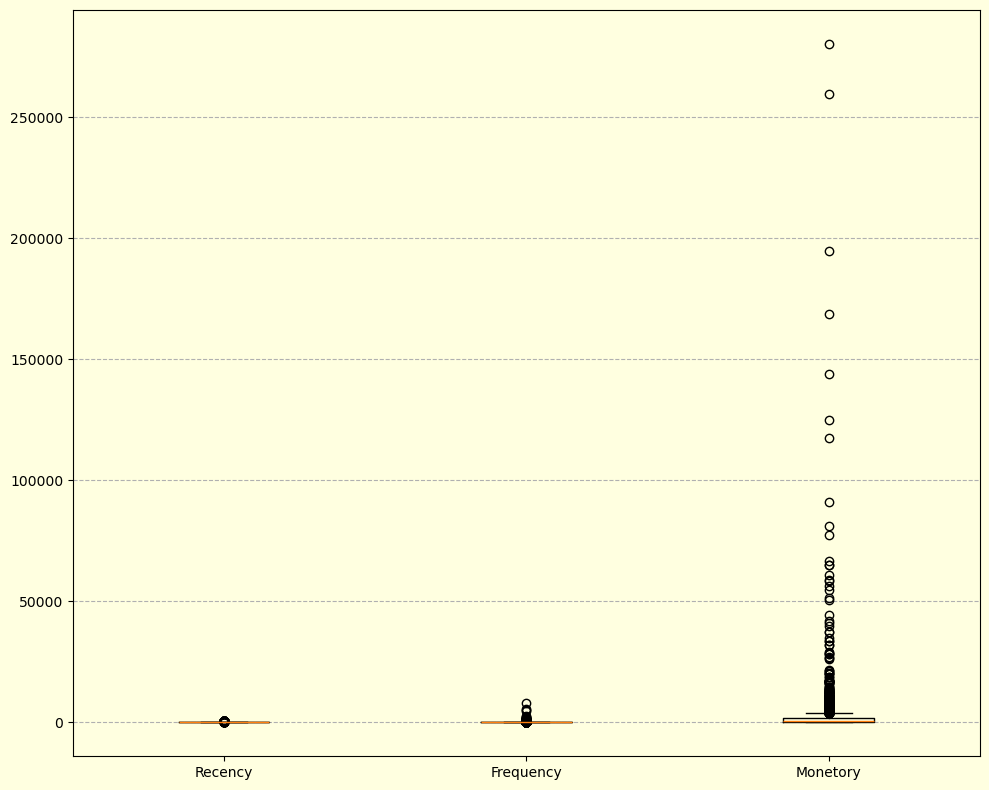

In [92]:
plt.figure(figsize=(10, 8), facecolor="lightyellow")
ax = plt.gca()
ax.set_facecolor("lightyellow")
plt.boxplot([rfm["Recency"], rfm["Frequency"],rfm["Monetory"]] , labels = ["Recency", "Frequency", "Monetory"])
plt.tight_layout()
plt.grid(axis = "y", linestyle = "--")
plt.show()


### 🔍 Technical Insights: Variance and Outlier Impact

* **Scale Disparity:** The **Monetary (Monetory)** distribution exhibits the highest variance, with extreme outliers reaching values near **100,000**. This confirms the presence of bulk-buying entities that differ significantly from typical retail consumers.
* **Frequency Concentration:** The **Frequency** metric is tightly clustered near the baseline, but shows several distinct outliers. These represent our most "engaged" users who maintain a constant transactional relationship with the brand.
* **Recency Stability:** The **Recency** distribution is the most balanced of the three, suggesting a relatively steady flow of returning customers, though the upper outliers indicate a segment of the population that has not interacted with the platform in a significant amount of time.
* **Modeling Conclusion:** Given the extreme outliers visible in the Monetary plot, the use of **Quantile-based scoring** (which we used for our RFM segments) is the correct analytical choice, as it is more robust to these extreme values than mean-based methods.
---

## 📊 Final Behavioral Distribution: Granular RFM Segments

The final stage of our segmentation involves visualizing the volume of customers within each specific behavioral category. By moving from macro-tiers to these five granular segments, we can tailor our operational responses to the distinct needs of each group—from high-touch concierge service for VIPs to automated re-engagement for lost customers.

### 🎨 Segment Color Mapping
* **At Risk Customers (Blue):** Medium-priority retention targets.
* **Can't Lose (Green):** High-priority re-activation targets.
* **Lost (Yellow):** Low-priority legacy accounts.
* **Potential Loyal (Orange):** Primary growth and upselling candidates.
* **VIP/Loyal (Red):** Essential revenue-driving advocates.

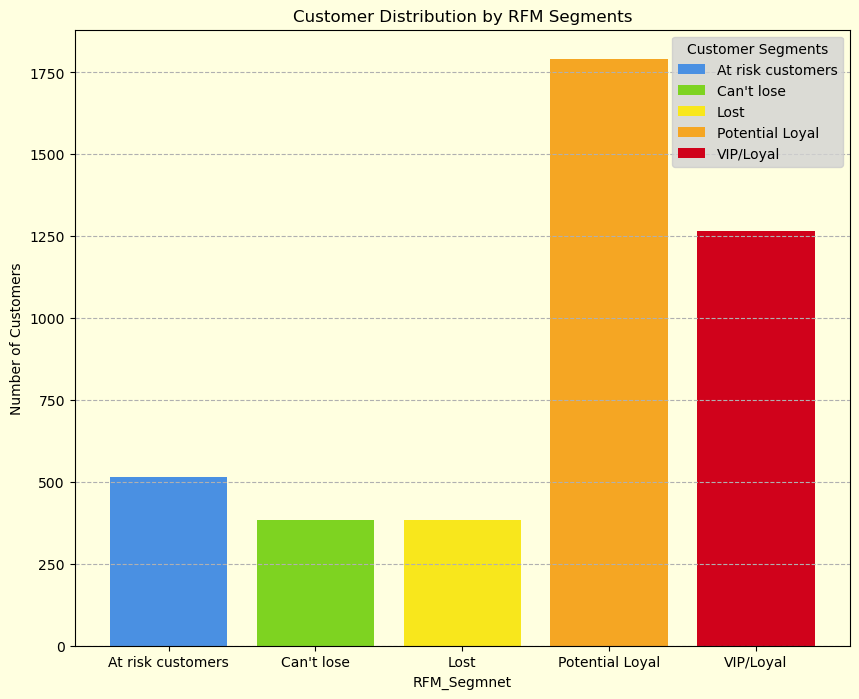

In [93]:
plt.figure(figsize=(10, 8), facecolor="lightyellow")
plt.gca().set_facecolor("lightyellow")
plt.bar(group_customer_segment["RFM_Customer_Segments"], group_customer_segment["count"], color = ["#4A90E2", "#7ED321", "#F8E71C", "#F5A623", "#D0021B"], label = group_customer_segment["RFM_Customer_Segments"])
plt.title("Customer Distribution by RFM Segments")
plt.xlabel("RFM_Segmnet")
plt.ylabel("Number of Customers")
plt.tight_layout
plt.grid(axis = "y", linestyle = "--")
plt.legend(title="Customer Segments").get_frame().set_facecolor("lightgray")
plt.show()

### 🔍 Technical Insights: Final Segment Distribution

* **Pipeline Health:** The **Potential Loyal** segment is the most populous, indicating a massive middle-of-the-funnel population. This is a positive indicator for future revenue growth, provided there is a clear strategy to transition these users into the VIP category.
* **High-Value Concentration:** The **VIP/Loyal** segment follows closely as the second-largest group. This confirms a strong brand-loyalty core, which is highly resistant to market fluctuations.
* **Churn Risk Assessment:** The combined volume of **At Risk**, **Can't Lose**, and **Lost** segments highlights the areas where the brand is currently leaking value. The "Can't Lose" group represents the highest opportunity cost; their high historical value justifies significant marketing expenditure for re-acquisition.
* **Analytical Conclusion:** This distribution provides a clear roadmap for the next quarter. Efforts should be concentrated on (1) Defending the VIP core, (2) Nurturing Potential Loyalists, and (3) Investigating the root causes for the "At Risk" segment's declining engagement.